# PEGG 2.0 Tutorial

Sections:
1. pegRNA design
    1. Input mutation formatting & pegRNA generation
        - Including (1) reference genome formatting, (2) cBioPortal datasets, and (3) ClinVar variant input
    3. Modifications to pegRNA parameters
        - Including selection of different pegRNA ranking algorithms
    4. Sensor parameters and visualizations
2. Base editing gRNA design
    1. Base editing gRNA parameters
3. Oligo generation
4. Library Design 

## 1. pegRNA design

In order to use PEGG to design pegRNAs, you must provide a set of mutations in a pandas DataFrame for PEGG to use. There are 3 acceptable input formats that PEGG accepts, which are outlined below:

### 1. "WT_ALT" format

In this format, the user feeds in a set of wildtype sequences, and the corresponding set of desired mutant sequences. PEGG then uses a built-in aligner to determine the mutation from these sequences, and design pegRNAs for these variants. Note: Complex INDELs will break this function because they are difficult to align. If you want to design INDELs, use one of the two formats below.

The pandas DataFrame must have at least 2 columns, with the following column names (1) ‘WT’ and (2) ‘ALT’

In [1]:
#importing the pegg modules
from pegg import prime 
from pegg import base 
from pegg import library

#also importing pandas for formatting mutation input
import pandas as pd

In [11]:
wt_seqs = ['AAAATCGTAGCTAGGCGTAGGGCGCGCGGGCTCGGAGGCGCGATGCGCATATGGATCGGGCTAGGCTAGCGCGGGCTAGCTAGCTTCGAGCCGCTA',
     'AAAATCGTAGCTAGGCGTAGGGCGCGCGGGCTCGGAGGCGCGATGCGCATTGGATCGGGCTAGGCTAGCGCGGGCTAGCTAGCTTCGAGCCGCTA',
     'AAAATCGTAGCTAGGCGTAGGGCGCGCGGGCTCGGAGGCGCGATGCGCATGTGCTGGATCGGGCTAGGCTAGCGCGGGCTAGCTAGCTTCGAGCCGCTA']

alt_seqs = ['AAAATCGTAGCTAGGCGTAGGGCGCGCGGGCTCGGAGGCGCGATGCGCATGTGGATCGGGCTAGGCTAGCGCGGGCTAGCTAGCTTCGAGCCGCTA',
     'AAAATCGTAGCTAGGCGTAGGGCGCGCGGGCTCGGAGGCGCGATGCGCATGTGCTGGATCGGGCTAGGCTAGCGCGGGCTAGCTAGCTTCGAGCCGCTA',
     'AAAATCGTAGCTAGGCGTAGGGCGCGCGGGCTCGGAGGCGCGATGCGCATTGGATCGGGCTAGGCTAGCGCGGGCTAGCTAGCTTCGAGCCGCTA']

input = pd.DataFrame(dict(zip(['WT', 'ALT'], [wt_seqs, alt_seqs])))

#options = 'cBioPortal', 'WT_ALT', 'PrimeDesign'
input_format = 'WT_ALT'

pegRNAs = prime.run(input, input_format)
pegRNAs

,mutation_idx,wt_w_context,alt_w_context,Variant_Type,REF,ALT,left_context,right_context,PAM_start,PAM_end,...,indel_size,PEGG2_Score,RF_Score,pegRNA_rank,sensor_wt,sensor_alt,sensor_orientation,sensor_error,contains_polyT_terminator,pegRNA_id
0,0,AAAATCGTAGCTAGGCGTAGGGCGCGCGGGCTCGGAGGCGCGATGC...,AAAATCGTAGCTAGGCGTAGGGCGCGCGGGCTCGGAGGCGCGATGC...,SNP,A,G,AAAATCGTAGCTAGGCGTAGGGCGCGCGGGCTCGGAGGCGCGATGC...,TGGATCGGGCTAGGCTAGCGCGGGCTAGCTAGCTTCGAGCCGCTA,51,54,...,0,22.852671,14.036697,1.0,AAGCTAGCTAGCCCGCGCTAGCCTAGCCCGATCCATATGCGCATCG...,AAGCTAGCTAGCCCGCGCTAGCCTAGCCCGATCCACATGCGCATCG...,reverse-complement,No Error,False,pegRNA_0
1,0,AAAATCGTAGCTAGGCGTAGGGCGCGCGGGCTCGGAGGCGCGATGC...,AAAATCGTAGCTAGGCGTAGGGCGCGCGGGCTCGGAGGCGCGATGC...,SNP,A,G,AAAATCGTAGCTAGGCGTAGGGCGCGCGGGCTCGGAGGCGCGATGC...,TGGATCGGGCTAGGCTAGCGCGGGCTAGCTAGCTTCGAGCCGCTA,51,54,...,0,22.746593,18.259481,2.0,AAGCTAGCTAGCCCGCGCTAGCCTAGCCCGATCCATATGCGCATCG...,AAGCTAGCTAGCCCGCGCTAGCCTAGCCCGATCCACATGCGCATCG...,reverse-complement,No Error,False,pegRNA_1
2,0,AAAATCGTAGCTAGGCGTAGGGCGCGCGGGCTCGGAGGCGCGATGC...,AAAATCGTAGCTAGGCGTAGGGCGCGCGGGCTCGGAGGCGCGATGC...,SNP,A,G,AAAATCGTAGCTAGGCGTAGGGCGCGCGGGCTCGGAGGCGCGATGC...,TGGATCGGGCTAGGCTAGCGCGGGCTAGCTAGCTTCGAGCCGCTA,51,54,...,0,22.370744,11.882613,3.0,AAGCTAGCTAGCCCGCGCTAGCCTAGCCCGATCCATATGCGCATCG...,AAGCTAGCTAGCCCGCGCTAGCCTAGCCCGATCCACATGCGCATCG...,reverse-complement,No Error,False,pegRNA_2
3,0,AAAATCGTAGCTAGGCGTAGGGCGCGCGGGCTCGGAGGCGCGATGC...,AAAATCGTAGCTAGGCGTAGGGCGCGCGGGCTCGGAGGCGCGATGC...,SNP,A,G,AAAATCGTAGCTAGGCGTAGGGCGCGCGGGCTCGGAGGCGCGATGC...,TGGATCGGGCTAGGCTAGCGCGGGCTAGCTAGCTTCGAGCCGCTA,51,54,...,0,22.323599,11.863588,4.0,AAGCTAGCTAGCCCGCGCTAGCCTAGCCCGATCCATATGCGCATCG...,AAGCTAGCTAGCCCGCGCTAGCCTAGCCCGATCCACATGCGCATCG...,reverse-complement,No Error,False,pegRNA_3
4,0,AAAATCGTAGCTAGGCGTAGGGCGCGCGGGCTCGGAGGCGCGATGC...,AAAATCGTAGCTAGGCGTAGGGCGCGCGGGCTCGGAGGCGCGATGC...,SNP,A,G,AAAATCGTAGCTAGGCGTAGGGCGCGCGGGCTCGGAGGCGCGATGC...,TGGATCGGGCTAGGCTAGCGCGGGCTAGCTAGCTTCGAGCCGCTA,51,54,...,0,22.264667,16.300928,5.0,AAGCTAGCTAGCCCGCGCTAGCCTAGCCCGATCCATATGCGCATCG...,AAGCTAGCTAGCCCGCGCTAGCCTAGCCCGATCCACATGCGCATCG...,reverse-complement,No Error,False,pegRNA_4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,2,AAAATCGTAGCTAGGCGTAGGGCGCGCGGGCTCGGAGGCGCGATGC...,AAAATCGTAGCTAGGCGTAGGGCGCGCGGGCTCGGAGGCGCGATGC...,DEL,GTGC,,AAAATCGTAGCTAGGCGTAGGGCGCGCGGGCTCGGAGGCGCGATGC...,TGGATCGGGCTAGGCTAGCGCGGGCTAGCTAGCTTCGAGCCGCTA,32,35,...,4,14.910326,1.612676,20.0,CTAGCCCGATCCAGCACATGCGCATCGCGCCTCCGAGCCCGCGCGC...,CTAGCCCGATCCAATGCGCATCGCGCCTCCGAGCCCGCGCGCCCTA...,reverse-complement,No Error,False,pegRNA_91
92,2,AAAATCGTAGCTAGGCGTAGGGCGCGCGGGCTCGGAGGCGCGATGC...,AAAATCGTAGCTAGGCGTAGGGCGCGCGGGCTCGGAGGCGCGATGC...,DEL,GTGC,,AAAATCGTAGCTAGGCGTAGGGCGCGCGGGCTCGGAGGCGCGATGC...,TGGATCGGGCTAGGCTAGCGCGGGCTAGCTAGCTTCGAGCCGCTA,32,35,...,4,14.754034,8.009558,21.0,CTAGCCCGATCCAGCACATGCGCATCGCGCCTCCGAGCCCGCGCGC...,CTAGCCCGATCCAATGCGCATCGCGCCTCCGAGCCCGCGCGCCCTA...,reverse-complement,No Error,False,pegRNA_92
93,2,AAAATCGTAGCTAGGCGTAGGGCGCGCGGGCTCGGAGGCGCGATGC...,AAAATCGTAGCTAGGCGTAGGGCGCGCGGGCTCGGAGGCGCGATGC...,DEL,GTGC,,AAAATCGTAGCTAGGCGTAGGGCGCGCGGGCTCGGAGGCGCGATGC...,TGGATCGGGCTAGGCTAGCGCGGGCTAGCTAGCTTCGAGCCGCTA,32,35,...,4,14.479736,3.665377,22.0,CTAGCCCGATCCAGCACATGCGCATCGCGCCTCCGAGCCCGCGCGC...,CTAGCCCGATCCAATGCGCATCGCGCCTCCGAGCCCGCGCGCCCTA...,reverse-complement,No Error,False,pegRNA_93
94,2,AAAATCGTAGCTAGGCGTAGGGCGCGCGGGCTCGGAGGCGCGATGC...,AAAATCGTAGCTAGGCGTAGGGCGCGCGGGCTCGGAGGCGCGATGC...,DEL,GTGC,,AAAATCGTAGCTAGGCGTAGGGCGCGCGGGCTCGGAGGCGCGATGC...,TGGATCGGGCTAGGCTAGCGCGGGCTAGCTAGCTTCGAGCCGCTA,32,35,...,4,14.362206,7.675017,23.0,CTAGCCCGATCCAGCACATGCGCATCGCGCCTCCGAGCCCGCGCGC...,CTAGCCCGATCCAATGCGCATCGCGCCTCCGAGCCCGCGCGCCCTA...,reverse-complement,No Error,False,pegRNA_94


### 2. "PrimeDesign" Format

In this format, users feed in a set of sequences with the desired edit in PrimeDesign format. For example, an A>G SNP would look like: “AATCG(A/G)GCTAG”, a “GTT” insertion would be: “AATCG(/GTT)GCTAG”, a “GTT” deletion: “AATCG(GTT/)GCTAG”, and a “C>GTT” INDEL: “AATCG(C/GTT)GCTAG”. It is reccomended that you include at least 100 nt of context sequence on either side of the variant.

The pandas DataFrame must have at least 1 column, with the following column name: (1) ‘SEQ’ . This column contains the PrimeDesign formatted sequences.

In [12]:
seqs = ['AAAATCGTAGCTAGGCGTAGGGCGCGCGGGCTCGGAGGCGCGATGCGCAT(A/G)TGGATCGGGCTAGGCTAGCGCGGGCTAGCTAGCTTCGAGCCGCTA',
     'AAAATCGTAGCTAGGCGTAGGGCGCGCGGGCTCGGAGGCGCGATGCGCAT(/GTGC)TGGATCGGGCTAGGCTAGCGCGGGCTAGCTAGCTTCGAGCCGCTA',
     'AAAATCGTAGCTAGGCGTAGGGCGCGCGGGCTCGGAGGCGCGATGCGCAT(A/GTGC)TGGATCGGGCTAGGCTAGCGCGGGCTAGCTAGCTTCGAGCCGCTA']

input = pd.DataFrame(dict(zip(['SEQ'], [seqs])))

#options = 'cBioPortal', 'WT_ALT', 'PrimeDesign'
input_format = 'PrimeDesign'

pegRNAs = prime.run(input, input_format)
pegRNAs

,mutation_idx,wt_w_context,alt_w_context,Variant_Type,REF,ALT,left_context,right_context,PAM_start,PAM_end,...,indel_size,PEGG2_Score,RF_Score,pegRNA_rank,sensor_wt,sensor_alt,sensor_orientation,sensor_error,contains_polyT_terminator,pegRNA_id
0,0,AAAATCGTAGCTAGGCGTAGGGCGCGCGGGCTCGGAGGCGCGATGC...,AAAATCGTAGCTAGGCGTAGGGCGCGCGGGCTCGGAGGCGCGATGC...,SNP,A,G,AAAATCGTAGCTAGGCGTAGGGCGCGCGGGCTCGGAGGCGCGATGC...,TGGATCGGGCTAGGCTAGCGCGGGCTAGCTAGCTTCGAGCCGCTA,51,54,...,0,22.852671,14.036697,1.0,AAGCTAGCTAGCCCGCGCTAGCCTAGCCCGATCCATATGCGCATCG...,AAGCTAGCTAGCCCGCGCTAGCCTAGCCCGATCCACATGCGCATCG...,reverse-complement,No Error,False,pegRNA_0
1,0,AAAATCGTAGCTAGGCGTAGGGCGCGCGGGCTCGGAGGCGCGATGC...,AAAATCGTAGCTAGGCGTAGGGCGCGCGGGCTCGGAGGCGCGATGC...,SNP,A,G,AAAATCGTAGCTAGGCGTAGGGCGCGCGGGCTCGGAGGCGCGATGC...,TGGATCGGGCTAGGCTAGCGCGGGCTAGCTAGCTTCGAGCCGCTA,51,54,...,0,22.746593,18.259481,2.0,AAGCTAGCTAGCCCGCGCTAGCCTAGCCCGATCCATATGCGCATCG...,AAGCTAGCTAGCCCGCGCTAGCCTAGCCCGATCCACATGCGCATCG...,reverse-complement,No Error,False,pegRNA_1
2,0,AAAATCGTAGCTAGGCGTAGGGCGCGCGGGCTCGGAGGCGCGATGC...,AAAATCGTAGCTAGGCGTAGGGCGCGCGGGCTCGGAGGCGCGATGC...,SNP,A,G,AAAATCGTAGCTAGGCGTAGGGCGCGCGGGCTCGGAGGCGCGATGC...,TGGATCGGGCTAGGCTAGCGCGGGCTAGCTAGCTTCGAGCCGCTA,51,54,...,0,22.370744,11.882613,3.0,AAGCTAGCTAGCCCGCGCTAGCCTAGCCCGATCCATATGCGCATCG...,AAGCTAGCTAGCCCGCGCTAGCCTAGCCCGATCCACATGCGCATCG...,reverse-complement,No Error,False,pegRNA_2
3,0,AAAATCGTAGCTAGGCGTAGGGCGCGCGGGCTCGGAGGCGCGATGC...,AAAATCGTAGCTAGGCGTAGGGCGCGCGGGCTCGGAGGCGCGATGC...,SNP,A,G,AAAATCGTAGCTAGGCGTAGGGCGCGCGGGCTCGGAGGCGCGATGC...,TGGATCGGGCTAGGCTAGCGCGGGCTAGCTAGCTTCGAGCCGCTA,51,54,...,0,22.323599,11.863588,4.0,AAGCTAGCTAGCCCGCGCTAGCCTAGCCCGATCCATATGCGCATCG...,AAGCTAGCTAGCCCGCGCTAGCCTAGCCCGATCCACATGCGCATCG...,reverse-complement,No Error,False,pegRNA_3
4,0,AAAATCGTAGCTAGGCGTAGGGCGCGCGGGCTCGGAGGCGCGATGC...,AAAATCGTAGCTAGGCGTAGGGCGCGCGGGCTCGGAGGCGCGATGC...,SNP,A,G,AAAATCGTAGCTAGGCGTAGGGCGCGCGGGCTCGGAGGCGCGATGC...,TGGATCGGGCTAGGCTAGCGCGGGCTAGCTAGCTTCGAGCCGCTA,51,54,...,0,22.264667,16.300928,5.0,AAGCTAGCTAGCCCGCGCTAGCCTAGCCCGATCCATATGCGCATCG...,AAGCTAGCTAGCCCGCGCTAGCCTAGCCCGATCCACATGCGCATCG...,reverse-complement,No Error,False,pegRNA_4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,2,AAAATCGTAGCTAGGCGTAGGGCGCGCGGGCTCGGAGGCGCGATGC...,AAAATCGTAGCTAGGCGTAGGGCGCGCGGGCTCGGAGGCGCGATGC...,INDEL,A,GTGC,AAAATCGTAGCTAGGCGTAGGGCGCGCGGGCTCGGAGGCGCGATGC...,TGGATCGGGCTAGGCTAGCGCGGGCTAGCTAGCTTCGAGCCGCTA,35,38,...,3,16.478004,0.124109,24.0,GCTAGCCTAGCCCGATCCATATGCGCATCGCGCCTCCGAGCCCGCG...,GCTAGCCTAGCCCGATCCAGCACATGCGCATCGCGCCTCCGAGCCC...,reverse-complement,No Error,False,pegRNA_95
96,2,AAAATCGTAGCTAGGCGTAGGGCGCGCGGGCTCGGAGGCGCGATGC...,AAAATCGTAGCTAGGCGTAGGGCGCGCGGGCTCGGAGGCGCGATGC...,INDEL,A,GTGC,AAAATCGTAGCTAGGCGTAGGGCGCGCGGGCTCGGAGGCGCGATGC...,TGGATCGGGCTAGGCTAGCGCGGGCTAGCTAGCTTCGAGCCGCTA,32,35,...,3,14.225501,2.980403,25.0,AGCCTAGCCCGATCCATATGCGCATCGCGCCTCCGAGCCCGCGCGC...,AGCCTAGCCCGATCCAGCACATGCGCATCGCGCCTCCGAGCCCGCG...,reverse-complement,No Error,False,pegRNA_96
97,2,AAAATCGTAGCTAGGCGTAGGGCGCGCGGGCTCGGAGGCGCGATGC...,AAAATCGTAGCTAGGCGTAGGGCGCGCGGGCTCGGAGGCGCGATGC...,INDEL,A,GTGC,AAAATCGTAGCTAGGCGTAGGGCGCGCGGGCTCGGAGGCGCGATGC...,TGGATCGGGCTAGGCTAGCGCGGGCTAGCTAGCTTCGAGCCGCTA,32,35,...,3,14.013872,2.980403,26.0,AGCCTAGCCCGATCCATATGCGCATCGCGCCTCCGAGCCCGCGCGC...,AGCCTAGCCCGATCCAGCACATGCGCATCGCGCCTCCGAGCCCGCG...,reverse-complement,No Error,False,pegRNA_97
98,2,AAAATCGTAGCTAGGCGTAGGGCGCGCGGGCTCGGAGGCGCGATGC...,AAAATCGTAGCTAGGCGTAGGGCGCGCGGGCTCGGAGGCGCGATGC...,INDEL,A,GTGC,AAAATCGTAGCTAGGCGTAGGGCGCGCGGGCTCGGAGGCGCGATGC...,TGGATCGGGCTAGGCTAGCGCGGGCTAGCTAGCTTCGAGCCGCTA,32,35,...,3,13.583282,2.919575,27.0,AGCCTAGCCCGATCCATATGCGCATCGCGCCTCCGAGCCCGCGCGC...,AGCCTAGCCCGATCCAGCACATGCGCATCGCGCCTCCGAGCCCGCG...,reverse-complement,No Error,False,pegRNA_98


### 3. "cBioPortal" Format

In this format, users simply provide a set of variants with their genome coordinates and reference and alternate alleles, as well as the variant type. This format is compatible with all of the datasets in the cBioPortal , which contains cancer-associated variant datasets.

If you want to build you own mutation dataset, it must have the following columns, with the associated column header names, in .csv format:

1. **Chromosome**: which chromosome the mutation falls in. Use integers or ‘X’ and ‘Y’.
2. **Start_Position**: start position of mutation in the reference genome (mutations should only be reported on the + strand)
3. **End_Position**: end position of mutation in the reference genome
4. **Variant_Typ**: what type of mutation is it. Options: “SNP”, “ONP”, “INS”, “DEL”, “INDEL”
5. **Reference_Allele**: what is the reference allele. For insertions, this should be set to “-“.
6. **Tumor_Seq_Allele2**: what is the mutant allele (i.e. what is the mutation sequence). For deletions, this should be set to “-“.

In addition, to use the “cBioPortal” input format, you must provide a genome that PEGG can use to find the associated sequences. There is a built in genome loader function that you can use, or you can format the chromosome sequences in a dictionary, with the keys as the chromosome identifiers.

An example for loading in a dataset and reference genome is provided here. This datasets/genome files are provided in the dropbox of reference files: https://www.dropbox.com/sh/5xsdzyiyrjiu9pf/AADiFFA3BQ3vX7swja-i2NBqa?dl=0


In [4]:
#loading in the reference genome
#In this case it's GRCh37

#MUST BE MODIFIED TO YOUR PARTICULAR FILEPATH
filepath = '/Users/samgould/Desktop/FSR Lab/reference files/GRCh37/ncbi-genomes-2022-03-17/GCF_000001405.25_GRCh37.p13_genomic.fna.gz'
chrom_dict, i = prime.genome_loader(filepath)

In [3]:
#and then loading in a cBioPortal dataset
impact = '/Users/samgould/Desktop/FSR Lab/reference files/2020-06-16-MSK-IMPACT_EDITED.txt'
mutant_input = pd.read_csv(impact, sep='\t')

In [5]:
#now selecting a subset of the variants and generating pegRNAs

#selecting the first 500 (could choose all of the variants, but it would take a long time to generate a few million pegRNAs)
input = mutant_input[0:500]
input_format = 'cBioPortal'
pegRNAs = prime.run(input, input_format, chrom_dict)

In [6]:
#generated nearly >25,000 pegRNA designs in under 1 minute (on M1 Max Macbook Pro; results will vary by computer)
pegRNAs

,mutation_idx,Hugo_Symbol,Entrez_Gene_Id,Center,NCBI_Build,Chromosome,Start_Position,End_Position,Strand,Consequence,...,indel_size,PEGG2_Score,RF_Score,pegRNA_rank,sensor_wt,sensor_alt,sensor_orientation,sensor_error,contains_polyT_terminator,pegRNA_id
0,1,BRCA2,0,MSKCC,37,13,32914437,32914438,+,NaN,...,1,22.290272,7.286294,1.0,GTAATGAAGCATCTGATACCTGGACAGATTTTCCACTTGCTGTGCT...,GTAATGAAGCATCTGATACCTGGACAGATTTTCCCTTGCTGTGCTA...,reverse-complement,No Error,False,pegRNA_0
1,1,BRCA2,0,MSKCC,37,13,32914437,32914438,+,NaN,...,1,21.979560,2.081356,2.0,GTAATGAAGCATCTGATACCTGGACAGATTTTCCACTTGCTGTGCT...,GTAATGAAGCATCTGATACCTGGACAGATTTTCCCTTGCTGTGCTA...,reverse-complement,No Error,True,pegRNA_1
2,1,BRCA2,0,MSKCC,37,13,32914437,32914438,+,NaN,...,1,21.873482,2.557368,3.0,GTAATGAAGCATCTGATACCTGGACAGATTTTCCACTTGCTGTGCT...,GTAATGAAGCATCTGATACCTGGACAGATTTTCCCTTGCTGTGCTA...,reverse-complement,No Error,True,pegRNA_2
3,1,BRCA2,0,MSKCC,37,13,32914437,32914438,+,NaN,...,1,21.403815,3.466958,4.0,GTAATGAAGCATCTGATACCTGGACAGATTTTCCACTTGCTGTGCT...,GTAATGAAGCATCTGATACCTGGACAGATTTTCCCTTGCTGTGCTA...,reverse-complement,No Error,False,pegRNA_3
4,1,BRCA2,0,MSKCC,37,13,32914437,32914438,+,NaN,...,1,21.324885,3.879538,5.0,GTAATGAAGCATCTGATACCTGGACAGATTTTCCACTTGCTGTGCT...,GTAATGAAGCATCTGATACCTGGACAGATTTTCCCTTGCTGTGCTA...,reverse-complement,No Error,True,pegRNA_4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26967,499,RPS6KA4,8986,MSKCC,GRCh37,11,64136002,64136002,+,missense_variant,...,0,14.079719,0.660449,52.0,CTGGCGGCAGCGGCGACACACAGAAAAGCTGCCCTGGCCCAGCGCA...,CTGGCGGCAGCGGCGACACACAGAAAATCTGCCCTGGCCCAGCGCA...,reverse-complement,No Error,False,pegRNA_26967
26968,499,RPS6KA4,8986,MSKCC,GRCh37,11,64136002,64136002,+,missense_variant,...,0,13.893342,0.674065,53.0,CTGGCGGCAGCGGCGACACACAGAAAAGCTGCCCTGGCCCAGCGCA...,CTGGCGGCAGCGGCGACACACAGAAAATCTGCCCTGGCCCAGCGCA...,reverse-complement,No Error,False,pegRNA_26968
26969,499,RPS6KA4,8986,MSKCC,GRCh37,11,64136002,64136002,+,missense_variant,...,0,13.770114,0.559974,54.0,GCAGCGGCGACACACAGAAAAGCTGCCCTGGCCCAGCGCAGGCTCC...,GCAGCGGCGACACACAGAAAATCTGCCCTGGCCCAGCGCAGGCTCC...,reverse-complement,No Error,False,pegRNA_26969
26970,499,RPS6KA4,8986,MSKCC,GRCh37,11,64136002,64136002,+,missense_variant,...,0,13.621981,0.900943,55.0,GCAGCGGCGACACACAGAAAAGCTGCCCTGGCCCAGCGCAGGCTCC...,GCAGCGGCGACACACAGAAAATCTGCCCTGGCCCAGCGCAGGCTCC...,reverse-complement,No Error,False,pegRNA_26970


In [12]:
# we can also check what fraction of the variants we can generate a pegRNA for
import numpy as np

total_muts = len(np.unique(pegRNAs['mutation_idx']))

print(f"We can generate pegRNAs for {total_muts}/500 input mutations ({np.round(total_muts*100/500, 2)}% of input)")

We can generate pegRNAs for 466/500 input mutations (93.2% of input)


## 4. Clinvar Formatted Variants

PEGG also has a built-in function for translating ClinVar IDs to the “cBioPortal” input format. To do so, download a ClinVar vcf.gz file, and choose your desired Variation IDs that you wish to model. These vcf.gz files are available in the Reference Files Dropbox Link (under the clinvar folder; https://www.dropbox.com/sh/5xsdzyiyrjiu9pf/AADiFFA3BQ3vX7swja-i2NBqa?dl=0) or the more up to date files can be accessed here: https://ftp.ncbi.nlm.nih.gov/pub/clinvar/

In [13]:
#BE MINDFUL OF THE REFERENCE GENOME USED IN THE CLINVAR FILE
filepath_clinvar = '/Users/samgould/Desktop/FSR Lab/reference files/clinvar/GrCh37_clinvar_20230923.vcf.gz'
variation_ids = [925574, 925434, 926695, 925707, 325626, 1191613, 308061, 361149, 1205375, 208043]
df = prime.clinvar_VCF_translator(filepath_clinvar, variation_ids)

df

[W::vcf_parse] Contig '1' is not defined in the header. (Quick workaround: index the file with tabix.)
[W::vcf_parse] Contig '2' is not defined in the header. (Quick workaround: index the file with tabix.)
[W::vcf_parse] Contig '3' is not defined in the header. (Quick workaround: index the file with tabix.)
[W::vcf_parse] Contig '4' is not defined in the header. (Quick workaround: index the file with tabix.)
[W::vcf_parse] Contig '5' is not defined in the header. (Quick workaround: index the file with tabix.)
[W::vcf_parse] Contig '6' is not defined in the header. (Quick workaround: index the file with tabix.)
[W::vcf_parse] Contig '7' is not defined in the header. (Quick workaround: index the file with tabix.)
[W::vcf_parse] Contig '8' is not defined in the header. (Quick workaround: index the file with tabix.)
[W::vcf_parse] Contig '9' is not defined in the header. (Quick workaround: index the file with tabix.)
[W::vcf_parse] Contig '10' is not defined in the header. (Quick workaroun

,Hugo_Symbol,Chromosome,Start_Position,End_Position,Reference_Allele,Tumor_Seq_Allele2,Variant_Type,Variation_ID,Allele_ID,CLNSIG,CLNHGVS,CLNDN
0,DVL1,1,1273425,1273426,AA,G,INDEL,208043,204308,Pathogenic,NC_000001.10:g.1273425_1273426delinsG,Autosomal_dominant_Robinow_syndrome_2
1,MSH6,2,48010028,48010028,G,T,SNP,1191613,1179546,Likely_benign,NC_000002.11:g.48010028G>T,not_provided
2,RRM2B,8,103218209,103218209,A,AT,INS,361149,312174,Likely_benign,NC_000008.10:g.103218209_103218210insT,Mitochondrial_DNA_depletion_syndrome|Progressi...
3,RRM2B,8,103231051,103231052,GC,AT,INDEL,1205375,1194005,Likely_pathogenic,NC_000008.10:g.103231051_103231052delinsAT,not_provided
4,KRAS,12,25358662,25358663,CT,C,DEL,308061,331617,Uncertain_significance,NC_000012.11:g.25358670del,Noonan_syndrome|Cardio-facio-cutaneous_syndrome
5,TP53,17,7571192,7571192,G,C,SNP,925574,914159,Likely_benign,NC_000017.10:g.7571192G>C,Hereditary_cancer-predisposing_syndrome
6,TP53,17,7571198,7571198,G,A,SNP,926695,914160,Likely_benign,NC_000017.10:g.7571198G>A,Hereditary_cancer-predisposing_syndrome
7,TP53,17,7571206,7571206,G,A,SNP,925707,914161,Likely_benign,NC_000017.10:g.7571206G>A,Hereditary_cancer-predisposing_syndrome
8,TP53,17,7571224,7571224,C,T,SNP,925434,914166,Likely_benign,NC_000017.10:g.7571224C>T,Hereditary_cancer-predisposing_syndrome
9,TP53,17,7572147,7572148,AG,A,DEL,325626,346158,Uncertain_significance,NC_000017.10:g.7572148del,Li-Fraumeni_syndrome


In [14]:
#this dataframe can then be input using cBioPortal format
input_format = 'cBioPortal'
pegRNAs = prime.run(df, input_format, chrom_dict)
pegRNAs

,mutation_idx,Hugo_Symbol,Chromosome,Start_Position,End_Position,Reference_Allele,Tumor_Seq_Allele2,Variant_Type,Variation_ID,Allele_ID,...,indel_size,PEGG2_Score,RF_Score,pegRNA_rank,sensor_wt,sensor_alt,sensor_orientation,sensor_error,contains_polyT_terminator,pegRNA_id
0,0,DVL1,1,1273425,1273426,AA,G,INDEL,208043,204308,...,1,20.508959,0.033407,1.0,GTACCCGGGACCCCCACCCTGCTTCCCGCCTGCCTACCAGGACCCG...,GTACCCGGGACCCCCACCCTGCCCCCGCCTGCCTACCAGGACCCGG...,reverse-complement,No Error,False,pegRNA_0
1,0,DVL1,1,1273425,1273426,AA,G,INDEL,208043,204308,...,1,20.419697,4.518390,2.0,CCTACCAGTACCCGGGACCCCCACCCTGCTTCCCGCCTGCCTACCA...,CCTACCAGTACCCGGGACCCCCACCCTGCCCCCGCCTGCCTACCAG...,reverse-complement,No Error,False,pegRNA_1
2,0,DVL1,1,1273425,1273426,AA,G,INDEL,208043,204308,...,1,20.360826,0.063523,3.0,GTACCCGGGACCCCCACCCTGCTTCCCGCCTGCCTACCAGGACCCG...,GTACCCGGGACCCCCACCCTGCCCCCGCCTGCCTACCAGGACCCGG...,reverse-complement,No Error,False,pegRNA_2
3,0,DVL1,1,1273425,1273426,AA,G,INDEL,208043,204308,...,1,20.353794,4.382173,4.0,CCTACCAGTACCCGGGACCCCCACCCTGCTTCCCGCCTGCCTACCA...,CCTACCAGTACCCGGGACCCCCACCCTGCCCCCGCCTGCCTACCAG...,reverse-complement,No Error,False,pegRNA_3
4,0,DVL1,1,1273425,1273426,AA,G,INDEL,208043,204308,...,1,20.315499,2.495223,5.0,CCTACCAGTACCCGGGACCCCCACCCTGCTTCCCGCCTGCCTACCA...,CCTACCAGTACCCGGGACCCCCACCCTGCCCCCGCCTGCCTACCAG...,reverse-complement,No Error,False,pegRNA_4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
699,8,TP53,17,7571224,7571224,C,T,SNP,925434,914166,...,0,14.456302,0.447744,136.0,GGTAAGAGTAGGGGTGTGGGGCTAGGTCCTTCCCAGCATCCCCTCA...,GGTAAGAGTAGGGGTATGGGGCTAGGTCCTTCCCAGCATCCCCTCA...,reverse-complement,No Error,False,pegRNA_699
700,8,TP53,17,7571224,7571224,C,T,SNP,925434,914166,...,0,14.316158,0.193573,137.0,GGTAAGAGTAGGGGTGTGGGGCTAGGTCCTTCCCAGCATCCCCTCA...,GGTAAGAGTAGGGGTATGGGGCTAGGTCCTTCCCAGCATCCCCTCA...,reverse-complement,No Error,False,pegRNA_700
701,8,TP53,17,7571224,7571224,C,T,SNP,925434,914166,...,0,14.308169,0.214662,138.0,GGTAAGAGTAGGGGTGTGGGGCTAGGTCCTTCCCAGCATCCCCTCA...,GGTAAGAGTAGGGGTATGGGGCTAGGTCCTTCCCAGCATCCCCTCA...,reverse-complement,No Error,False,pegRNA_701
702,8,TP53,17,7571224,7571224,C,T,SNP,925434,914166,...,0,13.955426,1.085628,139.0,GAGGGGATGCTGGGAAGGACCTAGCCCCACACCCCTACTCTTACCT...,GAGGGGATGCTGGGAAGGACCTAGCCCCATACCCCTACTCTTACCT...,reverse-complement,No Error,False,pegRNA_702


## Modifications to pegRNA parameters

pegRNA parameters can be extensively modified. For more information, see: https://pegg.readthedocs.io/en/latest/quickstart.html#design-options


In [20]:
seqs = ['AAAATCGTAGCTAGGCGTAGGGCGCGCGGGCTCGGAGGCGCGATGCGCAT(A/G)TGGATCGGGCTAGGCTAGCGCGGGCTAGCTAGCTTCGAGCCGCTA',
     'AAAATCGTAGCTAGGCGTAGGGCGCGCGGGCTCGGAGGCGCGATGCGCAT(/GTGC)TGGATCGGGCTAGGCTAGCGCGGGCTAGCTAGCTTCGAGCCGCTA',
     'AAAATCGTAGCTAGGCGTAGGGCGCGCGGGCTCGGAGGCGCGATGCGCAT(A/GTGC)TGGATCGGGCTAGGCTAGCGCGGGCTAGCTAGCTTCGAGCCGCTA']

input = pd.DataFrame(dict(zip(['SEQ'], [seqs])))

#options = 'cBioPortal', 'WT_ALT', 'PrimeDesign'
input_format = 'PrimeDesign'

#modifying the parameters; there are more parameters to modify (see website...)
pegRNAs_per_mut = 5
RTT_lengths = [10,20,30,40]
PBS_lengths = [7,8,9,10,11,12]
rankby = 'RF_Score' #rank by Random forest algorithm instead of 'PEGG2_Score'
RE_sites = ['CGTCTC', 'GAATTC'] #add recognition of EcoRI and Esp3I sites; this will be in the "contains_RE_site" column of the output...
min_RHA_size = 5 #minimum RHA (homology overhang) size

pegRNAs = prime.run(input, input_format, 
                    pegRNAs_per_mut=pegRNAs_per_mut, 
                    RTT_lengths=RTT_lengths, 
                    PBS_lengths = PBS_lengths,
                    rankby=rankby,
                    RE_sites = RE_sites, 
                    min_RHA_size=min_RHA_size)

pegRNAs

,mutation_idx,wt_w_context,alt_w_context,Variant_Type,REF,ALT,left_context,right_context,PAM_start,PAM_end,...,PEGG2_Score,RF_Score,pegRNA_rank,sensor_wt,sensor_alt,sensor_orientation,sensor_error,contains_polyT_terminator,contains_RE_site,pegRNA_id
0,0,AAAATCGTAGCTAGGCGTAGGGCGCGCGGGCTCGGAGGCGCGATGC...,AAAATCGTAGCTAGGCGTAGGGCGCGCGGGCTCGGAGGCGCGATGC...,SNP,A,G,AAAATCGTAGCTAGGCGTAGGGCGCGCGGGCTCGGAGGCGCGATGC...,TGGATCGGGCTAGGCTAGCGCGGGCTAGCTAGCTTCGAGCCGCTA,51,54,...,21.767181,32.329509,1.0,AAGCTAGCTAGCCCGCGCTAGCCTAGCCCGATCCATATGCGCATCG...,AAGCTAGCTAGCCCGCGCTAGCCTAGCCCGATCCACATGCGCATCG...,reverse-complement,No Error,False,False,pegRNA_0
1,0,AAAATCGTAGCTAGGCGTAGGGCGCGCGGGCTCGGAGGCGCGATGC...,AAAATCGTAGCTAGGCGTAGGGCGCGCGGGCTCGGAGGCGCGATGC...,SNP,A,G,AAAATCGTAGCTAGGCGTAGGGCGCGCGGGCTCGGAGGCGCGATGC...,TGGATCGGGCTAGGCTAGCGCGGGCTAGCTAGCTTCGAGCCGCTA,51,54,...,20.850782,32.329509,2.0,AAGCTAGCTAGCCCGCGCTAGCCTAGCCCGATCCATATGCGCATCG...,AAGCTAGCTAGCCCGCGCTAGCCTAGCCCGATCCACATGCGCATCG...,reverse-complement,No Error,False,False,pegRNA_1
2,0,AAAATCGTAGCTAGGCGTAGGGCGCGCGGGCTCGGAGGCGCGATGC...,AAAATCGTAGCTAGGCGTAGGGCGCGCGGGCTCGGAGGCGCGATGC...,SNP,A,G,AAAATCGTAGCTAGGCGTAGGGCGCGCGGGCTCGGAGGCGCGATGC...,TGGATCGGGCTAGGCTAGCGCGGGCTAGCTAGCTTCGAGCCGCTA,51,54,...,21.200615,32.329509,3.0,AAGCTAGCTAGCCCGCGCTAGCCTAGCCCGATCCATATGCGCATCG...,AAGCTAGCTAGCCCGCGCTAGCCTAGCCCGATCCACATGCGCATCG...,reverse-complement,No Error,False,False,pegRNA_2
3,0,AAAATCGTAGCTAGGCGTAGGGCGCGCGGGCTCGGAGGCGCGATGC...,AAAATCGTAGCTAGGCGTAGGGCGCGCGGGCTCGGAGGCGCGATGC...,SNP,A,G,AAAATCGTAGCTAGGCGTAGGGCGCGCGGGCTCGGAGGCGCGATGC...,TGGATCGGGCTAGGCTAGCGCGGGCTAGCTAGCTTCGAGCCGCTA,51,54,...,21.501645,32.329509,4.0,AAGCTAGCTAGCCCGCGCTAGCCTAGCCCGATCCATATGCGCATCG...,AAGCTAGCTAGCCCGCGCTAGCCTAGCCCGATCCACATGCGCATCG...,reverse-complement,No Error,False,False,pegRNA_3
4,0,AAAATCGTAGCTAGGCGTAGGGCGCGCGGGCTCGGAGGCGCGATGC...,AAAATCGTAGCTAGGCGTAGGGCGCGCGGGCTCGGAGGCGCGATGC...,SNP,A,G,AAAATCGTAGCTAGGCGTAGGGCGCGCGGGCTCGGAGGCGCGATGC...,TGGATCGGGCTAGGCTAGCGCGGGCTAGCTAGCTTCGAGCCGCTA,51,54,...,22.006096,32.138776,5.0,AAGCTAGCTAGCCCGCGCTAGCCTAGCCCGATCCATATGCGCATCG...,AAGCTAGCTAGCCCGCGCTAGCCTAGCCCGATCCACATGCGCATCG...,reverse-complement,No Error,False,False,pegRNA_4
5,1,AAAATCGTAGCTAGGCGTAGGGCGCGCGGGCTCGGAGGCGCGATGC...,AAAATCGTAGCTAGGCGTAGGGCGCGCGGGCTCGGAGGCGCGATGC...,INS,,GTGC,AAAATCGTAGCTAGGCGTAGGGCGCGCGGGCTCGGAGGCGCGATGC...,TGGATCGGGCTAGGCTAGCGCGGGCTAGCTAGCTTCGAGCCGCTA,32,35,...,14.115346,9.263458,1.0,TAGCCTAGCCCGATCCAATGCGCATCGCGCCTCCGAGCCCGCGCGC...,TAGCCTAGCCCGATCCAGCACATGCGCATCGCGCCTCCGAGCCCGC...,reverse-complement,No Error,False,False,pegRNA_5
6,1,AAAATCGTAGCTAGGCGTAGGGCGCGCGGGCTCGGAGGCGCGATGC...,AAAATCGTAGCTAGGCGTAGGGCGCGCGGGCTCGGAGGCGCGATGC...,INS,,GTGC,AAAATCGTAGCTAGGCGTAGGGCGCGCGGGCTCGGAGGCGCGATGC...,TGGATCGGGCTAGGCTAGCGCGGGCTAGCTAGCTTCGAGCCGCTA,32,35,...,14.221161,9.263458,2.0,TAGCCTAGCCCGATCCAATGCGCATCGCGCCTCCGAGCCCGCGCGC...,TAGCCTAGCCCGATCCAGCACATGCGCATCGCGCCTCCGAGCCCGC...,reverse-complement,No Error,False,False,pegRNA_6
7,1,AAAATCGTAGCTAGGCGTAGGGCGCGCGGGCTCGGAGGCGCGATGC...,AAAATCGTAGCTAGGCGTAGGGCGCGCGGGCTCGGAGGCGCGATGC...,INS,,GTGC,AAAATCGTAGCTAGGCGTAGGGCGCGCGGGCTCGGAGGCGCGATGC...,TGGATCGGGCTAGGCTAGCGCGGGCTAGCTAGCTTCGAGCCGCTA,32,35,...,14.009532,9.263458,3.0,TAGCCTAGCCCGATCCAATGCGCATCGCGCCTCCGAGCCCGCGCGC...,TAGCCTAGCCCGATCCAGCACATGCGCATCGCGCCTCCGAGCCCGC...,reverse-complement,No Error,False,False,pegRNA_7
8,1,AAAATCGTAGCTAGGCGTAGGGCGCGCGGGCTCGGAGGCGCGATGC...,AAAATCGTAGCTAGGCGTAGGGCGCGCGGGCTCGGAGGCGCGATGC...,INS,,GTGC,AAAATCGTAGCTAGGCGTAGGGCGCGCGGGCTCGGAGGCGCGATGC...,TGGATCGGGCTAGGCTAGCGCGGGCTAGCTAGCTTCGAGCCGCTA,32,35,...,13.903717,9.263458,4.0,TAGCCTAGCCCGATCCAATGCGCATCGCGCCTCCGAGCCCGCGCGC...,TAGCCTAGCCCGATCCAGCACATGCGCATCGCGCCTCCGAGCCCGC...,reverse-complement,No Error,False,False,pegRNA_8
9,1,AAAATCGTAGCTAGGCGTAGGGCGCGCGGGCTCGGAGGCGCGATGC...,AAAATCGTAGCTAGGCGTAGGGCGCGCGGGCTCGGAGGCGCGATGC...,INS,,GTGC,AAAATCGTAGCTAGGCGTAGGGCGCGCGGGCTCGGAGGCGCGATGC...,TGGATCGGGCTAGGCTAGCGCGGGCTAGCTAGCTTCGAGCCGCTA,32,35,...,13.5283

## Sensor parameters and visualization

The sensor is an artificial copy of the endogenous target that links each pegRNA or base editing gRNA to its editing outcome at the endogenous locus. This allows for the systematic identification of high efficiency pegRNAs while controlling for the confounding effects of variable editing efficiency in a screening context.

As discussed above, the parameters for sensor design are:

- sensor: True/False whether to include a sensor in the pegRNA design or not.

- before_proto_context: Default = 5. Amount of nucleotide context to put before the protospacer in the sensor

- sensor_length: Total length of the sensor in nt. Default = 60.

- sensor_orientation: Orientation of the sensor relative to the protospacer. Options for sensor_orientation = ‘reverse-complement’ or’forward’. Default = ‘reverse-complement’ (to minimize recombination).

There are cases where it is not possible to produce a sensor for a given pegRNA or gRNA. For example, if a deletion is too large such that it goes beyond the sequence contained in a sensor, PEGG will not produce a sensor sequence for that pegRNA. Or, for example, if insufficient context sequence is provided, a sensor cannot be generated. This information is contained in the “sensor_error” column of the output of prime.run() or base.run_base().

Here’s an example of a “forward” and "reverse-complement" oriented sensor:

In [23]:
seqs = ['AAAATCGTAGCTAGGCGTAGGGCGCGCGGGCTCGGAGGCGCGATGCGCAT(A/G)TGGATCGGGCTAGGCTAGCGCGGGCTAGCTAGCTTCGAGCCGCTA',
     'AAAATCGTAGCTAGGCGTAGGGCGCGCGGGCTCGGAGGCGCGATGCGCAT(/GTGC)TGGATCGGGCTAGGCTAGCGCGGGCTAGCTAGCTTCGAGCCGCTA',
     'AAAATCGTAGCTAGGCGTAGGGCGCGCGGGCTCGGAGGCGCGATGCGCAT(A/GTGC)TGGATCGGGCTAGGCTAGCGCGGGCTAGCTAGCTTCGAGCCGCTA']

input = pd.DataFrame(dict(zip(['SEQ'], [seqs])))

#options = 'cBioPortal', 'WT_ALT', 'PrimeDesign'
input_format = 'PrimeDesign'

pegRNAs_forward_sensor = prime.run(input, input_format, sensor_orientation='forward')
pegRNAs_rc_sensor = prime.run(input, input_format, sensor_orientation='reverse-complement')

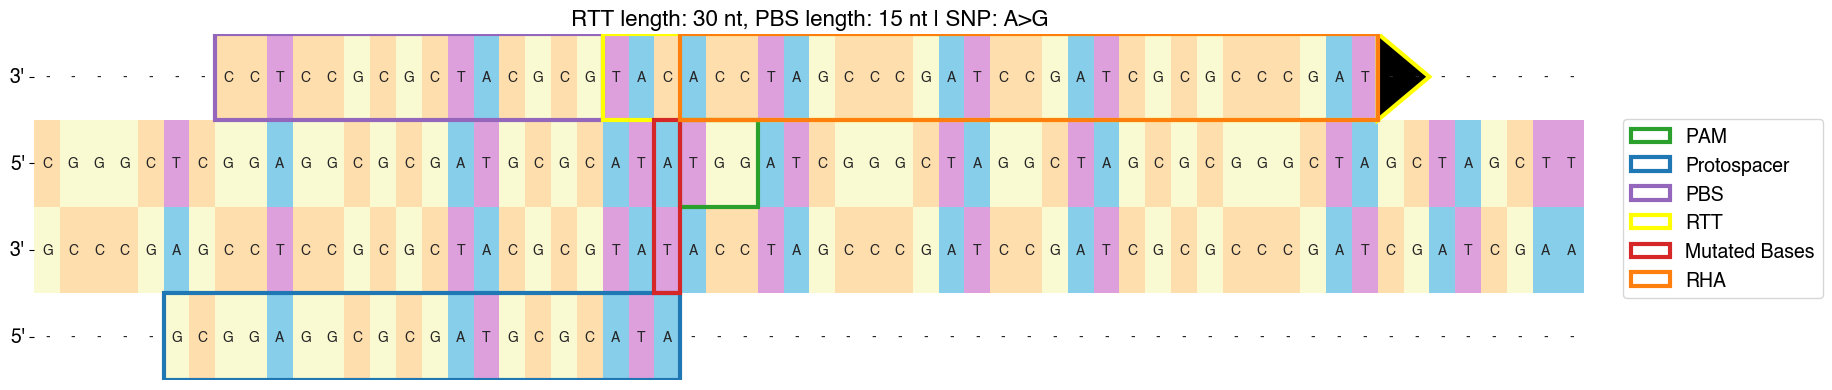

In [24]:
#forward sensor
#looking at mutation in row 0 of the ouput
row = 0
prime.sensor_viz(pegRNAs_forward_sensor, row)

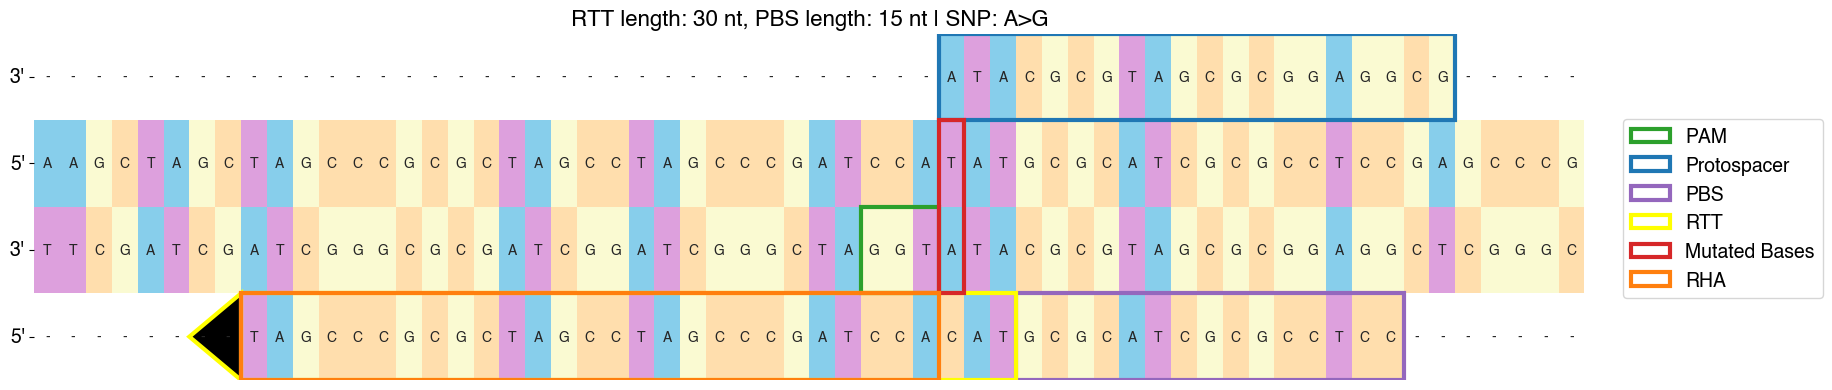

In [25]:
#reverse-complement sensor
#looking at mutation in row 0 of the ouput
row = 0
prime.sensor_viz(pegRNAs_rc_sensor, row)

# 2. Base Editing gRNA design

PEGG also contains a base editing module for designing base editing gRNA-sensor pairs. The input format is the same as for pegRNA generation (“cBioPortal”, “PrimeDesign”, or “WT_ALT”). The base editing design function will automatically filter non-SNP variants, and can be set to filter variants amenable to adenine base editing (ABE: A>G or T>C variants) and cytosine base editing (CBE: C>T or G>A variants):

In [45]:
seqs = ['AAAATCGTAGCTAGGCGTAGGGCGCGCGGGCTCGGAGGCGCGATGCGCAT(A/G)TGGATCGGGCTAGGCTCGGAGCGGCGGGCTAGCTAGCTTCGAGCCGCTATCGCCCATCCTGCAC',
      'AAAATCGTAGCTAGGCGTAGGGCGCGCGGGCTCCGGAGGCGCGATGCGCAT(C/T)TGGATCGGGCTAGGCTCGGAGCGGCGGGCTAGCTAGCTTCGAGCCGCTATCGCCCATCCTGCAC',
      'AAAATCGTAGCTAGGCGTAGGGCGCGCGGGCTCCGGAGGCCGCGATGCGCAT(T/A)TGGATCGGGCTAGGCTCGGAGCGGCGGGCTAGCTAGCTTCGAGCCGCTATCGCCCATCCTGCAC']

input = pd.DataFrame(dict(zip(['SEQ'], [seqs])))
input_format = 'PrimeDesign'

gRNAs = base.run_base(input, input_format)
gRNAs

,mutation_idx,wt_w_context,alt_w_context,Variant_Type,REF,ALT,left_context,right_context,PAM_start,PAM_end,...,Protospacer_Location,Ideal_Edit_Window,Editor,gRNA_id,OnTarget_Azimuth_Score,sensor_wt,sensor_alt,sensor_orientation,sensor_error,contains_polyT_terminator
0,0,AAAATCGTAGCTAGGCGTAGGGCGCGCGGGCTCGGAGGCGCGATGC...,AAAATCGTAGCTAGGCGTAGGGCGCGCGGGCTCGGAGGCGCGATGC...,SNP,A,G,AAAATCGTAGCTAGGCGTAGGGCGCGCGGGCTCGGAGGCGCGATGC...,TGGATCGGGCTAGGCTCGGAGCGGCGGGCTAGCTAGCTTCGAGCCG...,51,54,...,20,False,ABE,gRNA_0,48.0,GCCTAGCCCGATCCATATGCGCATCGCGCCTCCGAGCCCG,GCCTAGCCCGATCCACATGCGCATCGCGCCTCCGAGCCCG,reverse-complement,No Error,False
1,0,AAAATCGTAGCTAGGCGTAGGGCGCGCGGGCTCGGAGGCGCGATGC...,AAAATCGTAGCTAGGCGTAGGGCGCGCGGGCTCGGAGGCGCGATGC...,SNP,A,G,AAAATCGTAGCTAGGCGTAGGGCGCGCGGGCTCGGAGGCGCGATGC...,TGGATCGGGCTAGGCTCGGAGCGGCGGGCTAGCTAGCTTCGAGCCG...,56,59,...,15,False,ABE,gRNA_1,39.0,TCCGAGCCTAGCCCGATCCATATGCGCATCGCGCCTCCGA,TCCGAGCCTAGCCCGATCCACATGCGCATCGCGCCTCCGA,reverse-complement,No Error,False
2,0,AAAATCGTAGCTAGGCGTAGGGCGCGCGGGCTCGGAGGCGCGATGC...,AAAATCGTAGCTAGGCGTAGGGCGCGCGGGCTCGGAGGCGCGATGC...,SNP,A,G,AAAATCGTAGCTAGGCGTAGGGCGCGCGGGCTCGGAGGCGCGATGC...,TGGATCGGGCTAGGCTCGGAGCGGCGGGCTAGCTAGCTTCGAGCCG...,57,60,...,14,False,ABE,gRNA_2,46.0,CTCCGAGCCTAGCCCGATCCATATGCGCATCGCGCCTCCG,CTCCGAGCCTAGCCCGATCCACATGCGCATCGCGCCTCCG,reverse-complement,No Error,False
3,0,AAAATCGTAGCTAGGCGTAGGGCGCGCGGGCTCGGAGGCGCGATGC...,AAAATCGTAGCTAGGCGTAGGGCGCGCGGGCTCGGAGGCGCGATGC...,SNP,A,G,AAAATCGTAGCTAGGCGTAGGGCGCGCGGGCTCGGAGGCGCGATGC...,TGGATCGGGCTAGGCTCGGAGCGGCGGGCTAGCTAGCTTCGAGCCG...,62,65,...,9,False,ABE,gRNA_3,47.0,CGCCGCTCCGAGCCTAGCCCGATCCATATGCGCATCGCGC,CGCCGCTCCGAGCCTAGCCCGATCCACATGCGCATCGCGC,reverse-complement,No Error,False
4,0,AAAATCGTAGCTAGGCGTAGGGCGCGCGGGCTCGGAGGCGCGATGC...,AAAATCGTAGCTAGGCGTAGGGCGCGCGGGCTCGGAGGCGCGATGC...,SNP,A,G,AAAATCGTAGCTAGGCGTAGGGCGCGCGGGCTCGGAGGCGCGATGC...,TGGATCGGGCTAGGCTCGGAGCGGCGGGCTAGCTAGCTTCGAGCCG...,67,70,...,4,True,ABE,gRNA_4,52.0,TAGCCCGCCGCTCCGAGCCTAGCCCGATCCATATGCGCAT,TAGCCCGCCGCTCCGAGCCTAGCCCGATCCACATGCGCAT,reverse-complement,No Error,False
5,1,AAAATCGTAGCTAGGCGTAGGGCGCGCGGGCTCCGGAGGCGCGATG...,AAAATCGTAGCTAGGCGTAGGGCGCGCGGGCTCCGGAGGCGCGATG...,SNP,C,T,AAAATCGTAGCTAGGCGTAGGGCGCGCGGGCTCCGGAGGCGCGATG...,TGGATCGGGCTAGGCTCGGAGCGGCGGGCTAGCTAGCTTCGAGCCG...,52,55,...,20,False,CBE,gRNA_5,36.0,GCCTAGCCCGATCCAGATGCGCATCGCGCCTCCGGAGCCC,GCCTAGCCCGATCCAAATGCGCATCGCGCCTCCGGAGCCC,reverse-complement,No Error,False
6,1,AAAATCGTAGCTAGGCGTAGGGCGCGCGGGCTCCGGAGGCGCGATG...,AAAATCGTAGCTAGGCGTAGGGCGCGCGGGCTCCGGAGGCGCGATG...,SNP,C,T,AAAATCGTAGCTAGGCGTAGGGCGCGCGGGCTCCGGAGGCGCGATG...,TGGATCGGGCTAGGCTCGGAGCGGCGGGCTAGCTAGCTTCGAGCCG...,57,60,...,15,False,CBE,gRNA_6,36.0,TCCGAGCCTAGCCCGATCCAGATGCGCATCGCGCCTCCGG,TCCGAGCCTAGCCCGATCCAAATGCGCATCGCGCCTCCGG,reverse-complement,No Error,False
7,1,AAAATCGTAGCTAGGCGTAGGGCGCGCGGGCTCCGGAGGCGCGATG...,AAAATCGTAGCTAGGCGTAGGGCGCGCGGGCTCCGGAGGCGCGATG...,SNP,C,T,AAAATCGTAGCTAGGCGTAGGGCGCGCGGGCTCCGGAGGCGCGATG...,TGGATCGGGCTAGGCTCGGAGCGGCGGGCTAGCTAGCTTCGAGCCG...,58,61,...,14,False,CBE,gRNA_7,44.0,CTCCGAGCCTAGCCCGATCCAGATGCGCATCGCGCCTCCG,CTCCGAGCCTAGCCCGATCCAAATGCGCATCGCGCCTCCG,reverse-complement,No Error,False
8,1,AAAATCGTAGCTAGGCGTAGGGCGCGCGGGCTCCGGAGGCGCGATG...,AAAATCGTAGCTAGGCGTAGGGCGCGCGGGCTCCGGAGGCGCGATG...,SNP,C,T,AAAATCGTAGCTAGGCGTAGGGCGCGCGGGCTCCGGAGGCGCGATG...,TGGATCGGGCTAGGCTCGGAGCGGCGGGCTAGCTAGCTTCGAGCCG...,63,66,...,9,False,CBE,gRNA_8,44.0,CGCCGCTCCGAGCCTAGCCCGATCCAGATGCGCATCGCGC,CGCCGCTCCGAGCCTAGCCCGATCCAAATGCGCATCGCGC,reverse-complement,No Error,False
9,1,AAAATCGTAGCTAGGCGTAGGGCGCGCGGGCTCCGGAGGCGCGATG...,AAAATCGTAGCTAGGCGTAGGGCGCGCGGGCTCCGGAGGCGCGATG...,SNP,C,T,AAAATCGTAGCTAGGCGTAGGGCGCGCGGGCTCCGGAGGCGCGATG...,TGGATCGGGCTAGGCTCGGAGCGGCGGGCTAGCTAGCTTCGAGCCG...,68,71,...,4,True,CBE,gRNA_9,51.0,TAGCCCGCCGCTCCGAGCCTAGCCCGATCCAGATGCGCAT,TAGCCCGCCGCTCCGAGCCTAGCCCGATCCAAATGCGCAT,reverse-complement,No Error,False


In [46]:
# we can further pull out which of the edits are ABE vs. CBE

ABE = gRNAs[gRNAs['Editor']=='ABE']
ABE

,mutation_idx,wt_w_context,alt_w_context,Variant_Type,REF,ALT,left_context,right_context,PAM_start,PAM_end,...,Protospacer_Location,Ideal_Edit_Window,Editor,gRNA_id,OnTarget_Azimuth_Score,sensor_wt,sensor_alt,sensor_orientation,sensor_error,contains_polyT_terminator
0,0,AAAATCGTAGCTAGGCGTAGGGCGCGCGGGCTCGGAGGCGCGATGC...,AAAATCGTAGCTAGGCGTAGGGCGCGCGGGCTCGGAGGCGCGATGC...,SNP,A,G,AAAATCGTAGCTAGGCGTAGGGCGCGCGGGCTCGGAGGCGCGATGC...,TGGATCGGGCTAGGCTCGGAGCGGCGGGCTAGCTAGCTTCGAGCCG...,51,54,...,20,False,ABE,gRNA_0,48.0,GCCTAGCCCGATCCATATGCGCATCGCGCCTCCGAGCCCG,GCCTAGCCCGATCCACATGCGCATCGCGCCTCCGAGCCCG,reverse-complement,No Error,False
1,0,AAAATCGTAGCTAGGCGTAGGGCGCGCGGGCTCGGAGGCGCGATGC...,AAAATCGTAGCTAGGCGTAGGGCGCGCGGGCTCGGAGGCGCGATGC...,SNP,A,G,AAAATCGTAGCTAGGCGTAGGGCGCGCGGGCTCGGAGGCGCGATGC...,TGGATCGGGCTAGGCTCGGAGCGGCGGGCTAGCTAGCTTCGAGCCG...,56,59,...,15,False,ABE,gRNA_1,39.0,TCCGAGCCTAGCCCGATCCATATGCGCATCGCGCCTCCGA,TCCGAGCCTAGCCCGATCCACATGCGCATCGCGCCTCCGA,reverse-complement,No Error,False
2,0,AAAATCGTAGCTAGGCGTAGGGCGCGCGGGCTCGGAGGCGCGATGC...,AAAATCGTAGCTAGGCGTAGGGCGCGCGGGCTCGGAGGCGCGATGC...,SNP,A,G,AAAATCGTAGCTAGGCGTAGGGCGCGCGGGCTCGGAGGCGCGATGC...,TGGATCGGGCTAGGCTCGGAGCGGCGGGCTAGCTAGCTTCGAGCCG...,57,60,...,14,False,ABE,gRNA_2,46.0,CTCCGAGCCTAGCCCGATCCATATGCGCATCGCGCCTCCG,CTCCGAGCCTAGCCCGATCCACATGCGCATCGCGCCTCCG,reverse-complement,No Error,False
3,0,AAAATCGTAGCTAGGCGTAGGGCGCGCGGGCTCGGAGGCGCGATGC...,AAAATCGTAGCTAGGCGTAGGGCGCGCGGGCTCGGAGGCGCGATGC...,SNP,A,G,AAAATCGTAGCTAGGCGTAGGGCGCGCGGGCTCGGAGGCGCGATGC...,TGGATCGGGCTAGGCTCGGAGCGGCGGGCTAGCTAGCTTCGAGCCG...,62,65,...,9,False,ABE,gRNA_3,47.0,CGCCGCTCCGAGCCTAGCCCGATCCATATGCGCATCGCGC,CGCCGCTCCGAGCCTAGCCCGATCCACATGCGCATCGCGC,reverse-complement,No Error,False
4,0,AAAATCGTAGCTAGGCGTAGGGCGCGCGGGCTCGGAGGCGCGATGC...,AAAATCGTAGCTAGGCGTAGGGCGCGCGGGCTCGGAGGCGCGATGC...,SNP,A,G,AAAATCGTAGCTAGGCGTAGGGCGCGCGGGCTCGGAGGCGCGATGC...,TGGATCGGGCTAGGCTCGGAGCGGCGGGCTAGCTAGCTTCGAGCCG...,67,70,...,4,True,ABE,gRNA_4,52.0,TAGCCCGCCGCTCCGAGCCTAGCCCGATCCATATGCGCAT,TAGCCCGCCGCTCCGAGCCTAGCCCGATCCACATGCGCAT,reverse-complement,No Error,False


In [47]:
#and CBE

CBE = gRNAs[gRNAs['Editor']=='CBE']
CBE

,mutation_idx,wt_w_context,alt_w_context,Variant_Type,REF,ALT,left_context,right_context,PAM_start,PAM_end,...,Protospacer_Location,Ideal_Edit_Window,Editor,gRNA_id,OnTarget_Azimuth_Score,sensor_wt,sensor_alt,sensor_orientation,sensor_error,contains_polyT_terminator
5,1,AAAATCGTAGCTAGGCGTAGGGCGCGCGGGCTCCGGAGGCGCGATG...,AAAATCGTAGCTAGGCGTAGGGCGCGCGGGCTCCGGAGGCGCGATG...,SNP,C,T,AAAATCGTAGCTAGGCGTAGGGCGCGCGGGCTCCGGAGGCGCGATG...,TGGATCGGGCTAGGCTCGGAGCGGCGGGCTAGCTAGCTTCGAGCCG...,52,55,...,20,False,CBE,gRNA_5,36.0,GCCTAGCCCGATCCAGATGCGCATCGCGCCTCCGGAGCCC,GCCTAGCCCGATCCAAATGCGCATCGCGCCTCCGGAGCCC,reverse-complement,No Error,False
6,1,AAAATCGTAGCTAGGCGTAGGGCGCGCGGGCTCCGGAGGCGCGATG...,AAAATCGTAGCTAGGCGTAGGGCGCGCGGGCTCCGGAGGCGCGATG...,SNP,C,T,AAAATCGTAGCTAGGCGTAGGGCGCGCGGGCTCCGGAGGCGCGATG...,TGGATCGGGCTAGGCTCGGAGCGGCGGGCTAGCTAGCTTCGAGCCG...,57,60,...,15,False,CBE,gRNA_6,36.0,TCCGAGCCTAGCCCGATCCAGATGCGCATCGCGCCTCCGG,TCCGAGCCTAGCCCGATCCAAATGCGCATCGCGCCTCCGG,reverse-complement,No Error,False
7,1,AAAATCGTAGCTAGGCGTAGGGCGCGCGGGCTCCGGAGGCGCGATG...,AAAATCGTAGCTAGGCGTAGGGCGCGCGGGCTCCGGAGGCGCGATG...,SNP,C,T,AAAATCGTAGCTAGGCGTAGGGCGCGCGGGCTCCGGAGGCGCGATG...,TGGATCGGGCTAGGCTCGGAGCGGCGGGCTAGCTAGCTTCGAGCCG...,58,61,...,14,False,CBE,gRNA_7,44.0,CTCCGAGCCTAGCCCGATCCAGATGCGCATCGCGCCTCCG,CTCCGAGCCTAGCCCGATCCAAATGCGCATCGCGCCTCCG,reverse-complement,No Error,False
8,1,AAAATCGTAGCTAGGCGTAGGGCGCGCGGGCTCCGGAGGCGCGATG...,AAAATCGTAGCTAGGCGTAGGGCGCGCGGGCTCCGGAGGCGCGATG...,SNP,C,T,AAAATCGTAGCTAGGCGTAGGGCGCGCGGGCTCCGGAGGCGCGATG...,TGGATCGGGCTAGGCTCGGAGCGGCGGGCTAGCTAGCTTCGAGCCG...,63,66,...,9,False,CBE,gRNA_8,44.0,CGCCGCTCCGAGCCTAGCCCGATCCAGATGCGCATCGCGC,CGCCGCTCCGAGCCTAGCCCGATCCAAATGCGCATCGCGC,reverse-complement,No Error,False
9,1,AAAATCGTAGCTAGGCGTAGGGCGCGCGGGCTCCGGAGGCGCGATG...,AAAATCGTAGCTAGGCGTAGGGCGCGCGGGCTCCGGAGGCGCGATG...,SNP,C,T,AAAATCGTAGCTAGGCGTAGGGCGCGCGGGCTCCGGAGGCGCGATG...,TGGATCGGGCTAGGCTCGGAGCGGCGGGCTAGCTAGCTTCGAGCCG...,68,71,...,4,True,CBE,gRNA_9,51.0,TAGCCCGCCGCTCCGAGCCTAGCCCGATCCAGATGCGCAT,TAGCCCGCCGCTCCGAGCCTAGCCCGATCCAAATGCGCAT,reverse-complement,No Error,False


## base editing gRNA parameters

As we can see in the example above, by default, PEGG filters mutations that are not amenable to ABE or CBE. As a result, the last mutation (a T>A mutation) is filtered out.

This can be modified by the "filtration" parameters (for more info see: https://pegg.readthedocs.io/en/latest/quickstart.html#id2). We will also modify some of the other parameters.


In [69]:
#here's an exmaple with no filtration
#and a modified PAM sequence

seqs = ['AAAATCGTAGCTAGGCGTAGGGCGCGCGGGCTCGGAGGCGCGATGCGCAT(A/G)TGGATCGGGCTAGGCTCGGAGCGGCGGGCTAGCTAGCTTCGAGCCGCTATCGCCCATCCTGCAC',
      'AAAATCGTAGCTAGGCGTAGGGCGCGCGGGCTCCGGAGGCGCGATGCGCAT(C/T)TGGATCGGGCTAGGCTCGGAGCGGCGGGCTAGCTAGCTTCGAGCCGCTATCGCCCATCCTGCAC',
      'AAAATCGTAGCTAGGCGTAGGGCGCGCGGGCTCCGGAGGCCGCGATGCGCAT(T/A)TGGATCGGGCTAGGCTCGGAGCGGCGGGCTAGCTAGCTTCGAGCCGCTATCGCCCATCCTGCAC']

input = pd.DataFrame(dict(zip(['SEQ'], [seqs])))
input_format = 'PrimeDesign'


filtration = ['A>G', 'C>T', 'T>A'] #Don't filter out non-ABE/CBE amenable SNPs
#It's recommended to use this specification instead of "No filter", which is essentially just finding gRNAs that match up at the desired base (but doesn't discriminate between strands)
PAM = 'NG' #use an NG PAM instead of NGG
proto_size = 19
sensor_length=50

gRNAs = base.run_base(input, input_format, 
                      PAM = PAM,
                      proto_size=proto_size,
                      filtration = filtration,
                      sensor_length=sensor_length)

#because of our new "filtration" parameter, the last mutation is not included
gRNAs

,mutation_idx,wt_w_context,alt_w_context,Variant_Type,REF,ALT,left_context,right_context,PAM_start,PAM_end,...,Protospacer_Location,Ideal_Edit_Window,Editor,gRNA_id,OnTarget_Azimuth_Score,sensor_wt,sensor_alt,sensor_orientation,sensor_error,contains_polyT_terminator
0,0,AAAATCGTAGCTAGGCGTAGGGCGCGCGGGCTCGGAGGCGCGATGC...,AAAATCGTAGCTAGGCGTAGGGCGCGCGGGCTCGGAGGCGCGATGC...,SNP,A,G,AAAATCGTAGCTAGGCGTAGGGCGCGCGGGCTCGGAGGCGCGATGC...,TGGATCGGGCTAGGCTCGGAGCGGCGGGCTAGCTAGCTTCGAGCCG...,51,53,...,20,False,A>G,gRNA_0,48.0,GCCGCTCCGAGCCTAGCCCGATCCATATGCGCATCGCGCCTCCGAG...,GCCGCTCCGAGCCTAGCCCGATCCACATGCGCATCGCGCCTCCGAG...,reverse-complement,No Error,False
1,0,AAAATCGTAGCTAGGCGTAGGGCGCGCGGGCTCGGAGGCGCGATGC...,AAAATCGTAGCTAGGCGTAGGGCGCGCGGGCTCGGAGGCGCGATGC...,SNP,A,G,AAAATCGTAGCTAGGCGTAGGGCGCGCGGGCTCGGAGGCGCGATGC...,TGGATCGGGCTAGGCTCGGAGCGGCGGGCTAGCTAGCTTCGAGCCG...,52,54,...,19,False,A>G,gRNA_1,39.0,CGCCGCTCCGAGCCTAGCCCGATCCATATGCGCATCGCGCCTCCGA...,CGCCGCTCCGAGCCTAGCCCGATCCACATGCGCATCGCGCCTCCGA...,reverse-complement,No Error,False
2,0,AAAATCGTAGCTAGGCGTAGGGCGCGCGGGCTCGGAGGCGCGATGC...,AAAATCGTAGCTAGGCGTAGGGCGCGCGGGCTCGGAGGCGCGATGC...,SNP,A,G,AAAATCGTAGCTAGGCGTAGGGCGCGCGGGCTCGGAGGCGCGATGC...,TGGATCGGGCTAGGCTCGGAGCGGCGGGCTAGCTAGCTTCGAGCCG...,56,58,...,15,False,A>G,gRNA_2,39.0,AGCCCGCCGCTCCGAGCCTAGCCCGATCCATATGCGCATCGCGCCT...,AGCCCGCCGCTCCGAGCCTAGCCCGATCCACATGCGCATCGCGCCT...,reverse-complement,No Error,False
3,0,AAAATCGTAGCTAGGCGTAGGGCGCGCGGGCTCGGAGGCGCGATGC...,AAAATCGTAGCTAGGCGTAGGGCGCGCGGGCTCGGAGGCGCGATGC...,SNP,A,G,AAAATCGTAGCTAGGCGTAGGGCGCGCGGGCTCGGAGGCGCGATGC...,TGGATCGGGCTAGGCTCGGAGCGGCGGGCTAGCTAGCTTCGAGCCG...,57,59,...,14,False,A>G,gRNA_3,46.0,TAGCCCGCCGCTCCGAGCCTAGCCCGATCCATATGCGCATCGCGCC...,TAGCCCGCCGCTCCGAGCCTAGCCCGATCCACATGCGCATCGCGCC...,reverse-complement,No Error,False
4,0,AAAATCGTAGCTAGGCGTAGGGCGCGCGGGCTCGGAGGCGCGATGC...,AAAATCGTAGCTAGGCGTAGGGCGCGCGGGCTCGGAGGCGCGATGC...,SNP,A,G,AAAATCGTAGCTAGGCGTAGGGCGCGCGGGCTCGGAGGCGCGATGC...,TGGATCGGGCTAGGCTCGGAGCGGCGGGCTAGCTAGCTTCGAGCCG...,58,60,...,13,False,A>G,gRNA_4,58.0,CTAGCCCGCCGCTCCGAGCCTAGCCCGATCCATATGCGCATCGCGC...,CTAGCCCGCCGCTCCGAGCCTAGCCCGATCCACATGCGCATCGCGC...,reverse-complement,No Error,False
5,0,AAAATCGTAGCTAGGCGTAGGGCGCGCGGGCTCGGAGGCGCGATGC...,AAAATCGTAGCTAGGCGTAGGGCGCGCGGGCTCGGAGGCGCGATGC...,SNP,A,G,AAAATCGTAGCTAGGCGTAGGGCGCGCGGGCTCGGAGGCGCGATGC...,TGGATCGGGCTAGGCTCGGAGCGGCGGGCTAGCTAGCTTCGAGCCG...,62,64,...,9,False,A>G,gRNA_5,47.0,CTAGCTAGCCCGCCGCTCCGAGCCTAGCCCGATCCATATGCGCATC...,CTAGCTAGCCCGCCGCTCCGAGCCTAGCCCGATCCACATGCGCATC...,reverse-complement,No Error,False
6,0,AAAATCGTAGCTAGGCGTAGGGCGCGCGGGCTCGGAGGCGCGATGC...,AAAATCGTAGCTAGGCGTAGGGCGCGCGGGCTCGGAGGCGCGATGC...,SNP,A,G,AAAATCGTAGCTAGGCGTAGGGCGCGCGGGCTCGGAGGCGCGATGC...,TGGATCGGGCTAGGCTCGGAGCGGCGGGCTAGCTAGCTTCGAGCCG...,63,65,...,8,False,A>G,gRNA_6,53.0,GCTAGCTAGCCCGCCGCTCCGAGCCTAGCCCGATCCATATGCGCAT...,GCTAGCTAGCCCGCCGCTCCGAGCCTAGCCCGATCCACATGCGCAT...,reverse-complement,No Error,False
7,0,AAAATCGTAGCTAGGCGTAGGGCGCGCGGGCTCGGAGGCGCGATGC...,AAAATCGTAGCTAGGCGTAGGGCGCGCGGGCTCGGAGGCGCGATGC...,SNP,A,G,AAAATCGTAGCTAGGCGTAGGGCGCGCGGGCTCGGAGGCGCGATGC...,TGGATCGGGCTAGGCTCGGAGCGGCGGGCTAGCTAGCTTCGAGCCG...,67,69,...,4,True,A>G,gRNA_7,52.0,CGAAGCTAGCTAGCCCGCCGCTCCGAGCCTAGCCCGATCCATATGC...,CGAAGCTAGCTAGCCCGCCGCTCCGAGCCTAGCCCGATCCACATGC...,reverse-complement,No Error,False
8,0,AAAATCGTAGCTAGGCGTAGGGCGCGCGGGCTCGGAGGCGCGATGC...,AAAATCGTAGCTAGGCGTAGGGCGCGCGGGCTCGGAGGCGCGATGC...,SNP,A,G,AAAATCGTAGCTAGGCGTAGGGCGCGCGGGCTCGGAGGCGCGATGC...,TGGATCGGGCTAGGCTCGGAGCGGCGGGCTAGCTAGCTTCGAGCCG...,68,70,...,3,False,A>G,gRNA_8,44.0,TCGAAGCTAGCTAGCCCGCCGCTCCGAGCCTAGCCCGATCCATATG...,TCGAAGCTAGCTAGCCCGCCGCTCCGAGCCTAGCCCGATCCACATG...,reverse-complement,No Error,False
9,0,AAAATCGTAGCTAGGCGTAGGGCGCGCGGGCTCGGAGGCGCGATGC...,AAAATCGTAGCTAGGCGTAGGGCGCGCGGGCTCGGAGGCGCGATGC...,SNP,A,G,AAAATCGTAGCTAGGCGTAGGGCGCGCGGGCTCGGAGGCGCGATGC...,TGGATCGGGCTAGGCTCGGAGCGGCGGGCTAGCTAGCTTCGAGCCG...,70,72,...,1,False,A>G,gRNA_9,56.0,GCTCGAAGCTAGCTAGCCCGCCGCTCCGAGCCTAGCCCGATCCATA...,GCTCGAAGCTAGC

41


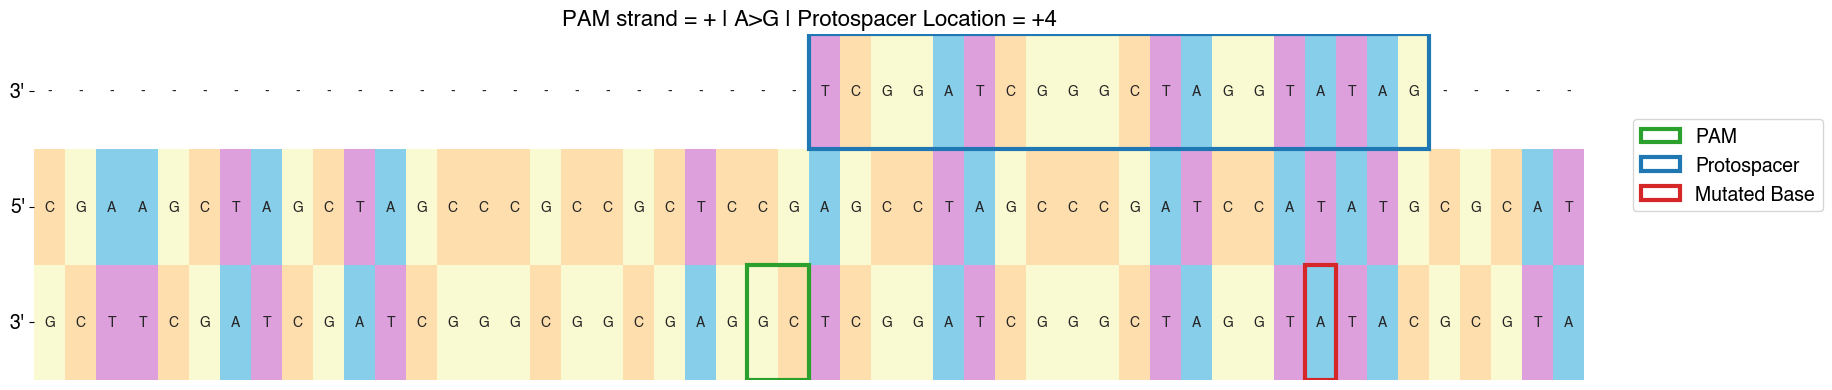

In [70]:
#and visualizing one of the gRNAs...
#this is a reverse-complement oriented sensor
base.sensor_viz_base(gRNAs, 7)

# 3. Oligo Generation

There are built in functions for generating oligonucleotides for restriction-enzyme based cloning. For more information see: https://pegg.readthedocs.io/en/latest/quickstart.html#oligo-generation

Future versions of PEGG will include automated generation of Golden Gate oligos that can simplify the cloning process/reduce the size of the fragments that need to be ordered.

## A. Prime editing oligos

This is generating pegRNA-sensor oligos with the default scaffold, the tevopreQ1 epegRNA motif, and the default 3' and 5' adapters (Esp3I and EcoRI restriction sites):

In [74]:
#this is using the default parameters for the PE oligos

oligos = prime.prime_oligo_generator(pegRNAs, 
                                     epeg=True,
                                     epeg_motif='tevopreQ1')

oligos

,mutation_idx,wt_w_context,alt_w_context,Variant_Type,REF,ALT,left_context,right_context,PAM_start,PAM_end,...,PEGG2_Score,RF_Score,pegRNA_rank,sensor_wt,sensor_alt,sensor_orientation,sensor_error,contains_polyT_terminator,pegRNA_id,pegRNA_oligo
0,0,AAAATCGTAGCTAGGCGTAGGGCGCGCGGGCTCGGAGGCGCGATGC...,AAAATCGTAGCTAGGCGTAGGGCGCGCGGGCTCGGAGGCGCGATGC...,SNP,A,G,AAAATCGTAGCTAGGCGTAGGGCGCGCGGGCTCGGAGGCGCGATGC...,TGGATCGGGCTAGGCTAGCGCGGGCTAGCTAGCTTCGAGCCGCTA,51,54,...,22.852671,14.036697,1.0,CGGGCTCGGAGGCGCGATGCGCATATGGATCGGGCTAGGCTAGCGC...,CGGGCTCGGAGGCGCGATGCGCATGTGGATCGGGCTAGGCTAGCGC...,forward,No Error,False,pegRNA_0,AGCGTACACGTCTCACACCGCGGAGGCGCGATGCGCATAGTTTTAG...
1,0,AAAATCGTAGCTAGGCGTAGGGCGCGCGGGCTCGGAGGCGCGATGC...,AAAATCGTAGCTAGGCGTAGGGCGCGCGGGCTCGGAGGCGCGATGC...,SNP,A,G,AAAATCGTAGCTAGGCGTAGGGCGCGCGGGCTCGGAGGCGCGATGC...,TGGATCGGGCTAGGCTAGCGCGGGCTAGCTAGCTTCGAGCCGCTA,51,54,...,22.746593,18.259481,2.0,CGGGCTCGGAGGCGCGATGCGCATATGGATCGGGCTAGGCTAGCGC...,CGGGCTCGGAGGCGCGATGCGCATGTGGATCGGGCTAGGCTAGCGC...,forward,No Error,False,pegRNA_1,AGCGTACACGTCTCACACCGCGGAGGCGCGATGCGCATAGTTTTAG...
2,0,AAAATCGTAGCTAGGCGTAGGGCGCGCGGGCTCGGAGGCGCGATGC...,AAAATCGTAGCTAGGCGTAGGGCGCGCGGGCTCGGAGGCGCGATGC...,SNP,A,G,AAAATCGTAGCTAGGCGTAGGGCGCGCGGGCTCGGAGGCGCGATGC...,TGGATCGGGCTAGGCTAGCGCGGGCTAGCTAGCTTCGAGCCGCTA,51,54,...,22.370744,11.882613,3.0,CGGGCTCGGAGGCGCGATGCGCATATGGATCGGGCTAGGCTAGCGC...,CGGGCTCGGAGGCGCGATGCGCATGTGGATCGGGCTAGGCTAGCGC...,forward,No Error,False,pegRNA_2,AGCGTACACGTCTCACACCGCGGAGGCGCGATGCGCATAGTTTTAG...
3,0,AAAATCGTAGCTAGGCGTAGGGCGCGCGGGCTCGGAGGCGCGATGC...,AAAATCGTAGCTAGGCGTAGGGCGCGCGGGCTCGGAGGCGCGATGC...,SNP,A,G,AAAATCGTAGCTAGGCGTAGGGCGCGCGGGCTCGGAGGCGCGATGC...,TGGATCGGGCTAGGCTAGCGCGGGCTAGCTAGCTTCGAGCCGCTA,51,54,...,22.323599,11.863588,4.0,CGGGCTCGGAGGCGCGATGCGCATATGGATCGGGCTAGGCTAGCGC...,CGGGCTCGGAGGCGCGATGCGCATGTGGATCGGGCTAGGCTAGCGC...,forward,No Error,False,pegRNA_3,AGCGTACACGTCTCACACCGCGGAGGCGCGATGCGCATAGTTTTAG...
4,0,AAAATCGTAGCTAGGCGTAGGGCGCGCGGGCTCGGAGGCGCGATGC...,AAAATCGTAGCTAGGCGTAGGGCGCGCGGGCTCGGAGGCGCGATGC...,SNP,A,G,AAAATCGTAGCTAGGCGTAGGGCGCGCGGGCTCGGAGGCGCGATGC...,TGGATCGGGCTAGGCTAGCGCGGGCTAGCTAGCTTCGAGCCGCTA,51,54,...,22.264667,16.300928,5.0,CGGGCTCGGAGGCGCGATGCGCATATGGATCGGGCTAGGCTAGCGC...,CGGGCTCGGAGGCGCGATGCGCATGTGGATCGGGCTAGGCTAGCGC...,forward,No Error,False,pegRNA_4,AGCGTACACGTCTCACACCGCGGAGGCGCGATGCGCATAGTTTTAG...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,2,AAAATCGTAGCTAGGCGTAGGGCGCGCGGGCTCGGAGGCGCGATGC...,AAAATCGTAGCTAGGCGTAGGGCGCGCGGGCTCGGAGGCGCGATGC...,INDEL,A,GTGC,AAAATCGTAGCTAGGCGTAGGGCGCGCGGGCTCGGAGGCGCGATGC...,TGGATCGGGCTAGGCTAGCGCGGGCTAGCTAGCTTCGAGCCGCTA,35,38,...,16.478004,0.124109,24.0,CTAGGCGTAGGGCGCGCGGGCTCGGAGGCGCGATGCGCATATGGAT...,CTAGGCGTAGGGCGCGCGGGCTCGGAGGCGCGATGCGCATGTGCTG...,forward,No Error,False,pegRNA_95,AGCGTACACGTCTCACACCGGTAGGGCGCGCGGGCTCGGGTTTTAG...
96,2,AAAATCGTAGCTAGGCGTAGGGCGCGCGGGCTCGGAGGCGCGATGC...,AAAATCGTAGCTAGGCGTAGGGCGCGCGGGCTCGGAGGCGCGATGC...,INDEL,A,GTGC,AAAATCGTAGCTAGGCGTAGGGCGCGCGGGCTCGGAGGCGCGATGC...,TGGATCGGGCTAGGCTAGCGCGGGCTAGCTAGCTTCGAGCCGCTA,32,35,...,14.225501,2.980403,25.0,TAGCTAGGCGTAGGGCGCGCGGGCTCGGAGGCGCGATGCGCATATG...,TAGCTAGGCGTAGGGCGCGCGGGCTCGGAGGCGCGATGCGCATGTG...,forward,No Error,False,pegRNA_96,AGCGTACACGTCTCACACCGGGCGTAGGGCGCGCGGGCTGTTTTAG...
97,2,AAAATCGTAGCTAGGCGTAGGGCGCGCGGGCTCGGAGGCGCGATGC...,AAAATCGTAGCTAGGCGTAGGGCGCGCGGGCTCGGAGGCGCGATGC...,INDEL,A,GTGC,AAAATCGTAGCTAGGCGTAGGGCGCGCGGGCTCGGAGGCGCGATGC...,TGGATCGGGCTAGGCTAGCGCGGGCTAGCTAGCTTCGAGCCGCTA,32,35,...,14.013872,2.980403,26.0,TAGCTAGGCGTAGGGCGCGCGGGCTCGGAGGCGCGATGCGCATATG...,TAGCTAGGCGTAGGGCGCGCGGGCTCGGAGGCGCGATGCGCATGTG...,forward,No Error,False,pegRNA_97,AGCGTACACGTCTCACACCGGGCGTAGGGCGCGCGGGCTGTTTTAG...
98,2,AAAATCGTAGCTAGGCGTAGGGCGCGCGGGCTCGGAGGCGCGATGC...,AAAATCGTAGCTAGGCGTAGGGCGCGCGGGCTCGGAGGCGCGATGC...,INDEL,A,GTGC,AAAATCGTAGCTAGGCGTAGGGCGCGCGGGCTCGGAGGCGCGATGC...,TGGATCGGGCTAGGCTAGCGCGGGCTAGCTAGCTTCGAGCCGCTA,32,35,...,13.583282,2.919575,27.0,TAGCT

In [75]:
#if we want to pull out only the oligos, we can do so
oligos_only = oligos[['pegRNA_id', 'pegRNA_oligo']]
oligos_only

,pegRNA_id,pegRNA_oligo
0,pegRNA_0,AGCGTACACGTCTCACACCGCGGAGGCGCGATGCGCATAGTTTTAG...
1,pegRNA_1,AGCGTACACGTCTCACACCGCGGAGGCGCGATGCGCATAGTTTTAG...
2,pegRNA_2,AGCGTACACGTCTCACACCGCGGAGGCGCGATGCGCATAGTTTTAG...
3,pegRNA_3,AGCGTACACGTCTCACACCGCGGAGGCGCGATGCGCATAGTTTTAG...
4,pegRNA_4,AGCGTACACGTCTCACACCGCGGAGGCGCGATGCGCATAGTTTTAG...
...,...,...
95,pegRNA_95,AGCGTACACGTCTCACACCGGTAGGGCGCGCGGGCTCGGGTTTTAG...
96,pegRNA_96,AGCGTACACGTCTCACACCGGGCGTAGGGCGCGCGGGCTGTTTTAG...
97,pegRNA_97,AGCGTACACGTCTCACACCGGGCGTAGGGCGCGCGGGCTGTTTTAG...
98,pegRNA_98,AGCGTACACGTCTCACACCGGGCGTAGGGCGCGCGGGCTGTTTTAG...


## B. Base editing oligos

This works the same way. You can also customize the scaffold, and three/five prime adapters, or keep the defaults.

In [79]:
#Note there's currently a simple error that needs to be updated
#For simple fix, do the following:
gRNAs['RTT_PBS'] = None
base_oligos = base.base_oligo_generator(gRNAs)

In [80]:
#and agai if we want to pull out only the oligos, we can do so
oligos_only = base_oligos[['gRNA_id', 'gRNA_oligo']]
oligos_only

,gRNA_id,gRNA_oligo
0,gRNA_0,AGCGTACACGTCTCACACCGCGGAGGCGCGATGCGCATAGTTTTAG...
1,gRNA_1,AGCGTACACGTCTCACACCGGGAGGCGCGATGCGCATATGTTTTAG...
2,gRNA_2,AGCGTACACGTCTCACACCGGCGCGATGCGCATATGGATGTTTTAG...
3,gRNA_3,AGCGTACACGTCTCACACCGCGCGATGCGCATATGGATCGTTTTAG...
4,gRNA_4,AGCGTACACGTCTCACACCGGCGATGCGCATATGGATCGGTTTTAG...
5,gRNA_5,AGCGTACACGTCTCACACCGTGCGCATATGGATCGGGCTGTTTTAG...
6,gRNA_6,AGCGTACACGTCTCACACCGGCGCATATGGATCGGGCTAGTTTTAG...
7,gRNA_7,AGCGTACACGTCTCACACCGATATGGATCGGGCTAGGCTGTTTTAG...
8,gRNA_8,AGCGTACACGTCTCACACCGTATGGATCGGGCTAGGCTCGTTTTAG...
9,gRNA_9,AGCGTACACGTCTCACACCGTGGATCGGGCTAGGCTCGGGTTTTAG...


## Further filtration

You'll likely want to remove pegRNAs/gRNAs that contain terminators or restriction enzyme sites by setting "contains_polyT_terminator" == False and "contains_RE_site" == False prior to cloning

# 4. Library Design

PEGG also contains a library design module. This module can produce non-targeting, safe-targeting, and silent control guides to act as controls in pooled screening. Non-targeting guides target no location in the genome (taken from Meier et al., 2017), while safe-targeting guides target “safe regions” with no annotated function, as defined by Morgens et al., 2017 .

Note: safe-targeting guides require human genome GRCh37 or mouse genome GRCm38

## 1. Safe-targeting mutations

Let's start by generating a set of safe-targeting mutations. These can be added to the set of input mutations manually to act as controls in a library setting. Note, these are mutations, not guides, so they're not guaranteed to have an accessible PAM sequence.

In [82]:
#generate 100 safe-targeting loci that can be fed into PEGG
num_muts = 100
safe = library.safe_muts(num_muts, chrom_dict, organism='human')
safe

,Chromosome,Variant_Type,Start_Position,End_Position,Reference_Allele,Tumor_Seq_Allele2,classification
0,1,SNP,74612220,74612220,A,A,safe-targeting control
1,1,SNP,102613838,102613838,A,A,safe-targeting control
2,1,SNP,111286716,111286716,T,T,safe-targeting control
3,1,SNP,194064314,194064314,C,C,safe-targeting control
4,1,SNP,213926604,213926604,A,A,safe-targeting control
...,...,...,...,...,...,...,...
95,X,SNP,94965602,94965602,A,A,safe-targeting control
96,X,SNP,117606489,117606489,A,A,safe-targeting control
97,X,SNP,136105854,136105854,C,C,safe-targeting control
98,X,SNP,140230929,140230929,T,T,safe-targeting control


## 2. Non-targeting guides

There are a preloaded set of non-targeting base/prime editing GUIDES (not mutations), which can be added to the final list of pegRNAs/gRNAs to act as controls as well:

In [84]:
#and also generate 100 non-targeting guides for prime editing
num_guides = 100
nontarget = library.nontargeting_guides(num_guides, edit_type='prime')
nontarget

,Protospacer,RTT,RTT_length,PBS,PBS_length,RTT_PBS,classification
0,GACGGAGGCTAAGCGTCGCAA,CGCATGCTTG,10,CGACGCTTAG,10,CGCATGCTTGCGACGCTTAG,non-targeting control
1,GCGCTTCCGCGGCCCGTTCAA,CGCATGCTTG,10,AACGGGCCGC,10,CGCATGCTTGAACGGGCCGC,non-targeting control
2,GATCGTTTCCGCTTAACGGCG,CGCATGCCGC,10,CGTTAAGCGG,10,CGCATGCCGCCGTTAAGCGG,non-targeting control
3,GGTAGGCGCGCCGCTCTCTAC,CGCATGCGTA,10,GAGAGCGGCG,10,CGCATGCGTAGAGAGCGGCG,non-targeting control
4,GCCATATCGGGGCGAGACATG,CGCATGCCAT,10,GTCTCGCCCC,10,CGCATGCCATGTCTCGCCCC,non-targeting control
...,...,...,...,...,...,...,...
95,GTACCCTCCGGATACGGACTG,CGCATGCCAG,10,TCCGTATCCG,10,CGCATGCCAGTCCGTATCCG,non-targeting control
96,GCCGTTGGACTATGGCGGGTC,CGCATGCGAC,10,CCGCCATAGT,10,CGCATGCGACCCGCCATAGT,non-targeting control
97,GGTACGGGGCGATCATCCACA,CGCATGCTGT,10,GGATGATCGC,10,CGCATGCTGTGGATGATCGC,non-targeting control
98,GAAGAGTAGTAGACGCCCGGG,CGCATGCCCC,10,GGGCGTCTAC,10,CGCATGCCCCGGGCGTCTAC,non-targeting control


In [86]:
#and base
#and also generate 100 non-targeting guides for prime editing
num_guides = 100
nontarget = library.nontargeting_guides(num_guides, edit_type='base')
nontarget

,Protospacer,classification
0,GACGGAGGCTAAGCGTCGCAA,non-targeting control
1,GCGCTTCCGCGGCCCGTTCAA,non-targeting control
2,GATCGTTTCCGCTTAACGGCG,non-targeting control
3,GGTAGGCGCGCCGCTCTCTAC,non-targeting control
4,GCCATATCGGGGCGAGACATG,non-targeting control
...,...,...
95,GTACCCTCCGGATACGGACTG,non-targeting control
96,GCCGTTGGACTATGGCGGGTC,non-targeting control
97,GGTACGGGGCGATCATCCACA,non-targeting control
98,GAAGAGTAGTAGACGCCCGGG,non-targeting control


## 3. Silent Substitution Guides

There's also a function for generating neutral/silent substitutions for a particular transcript. This requires that you provide information about the transcript of interest. This was done using gffutils.

For more information on how to automate this process, see: https://daler.github.io/gffutils/ or https://blog.liang2.tw/posts/2018/06/gene-annotation-using-gffutils/ or contact the authors (samgould@mit.edu)

In [89]:
#generating a set of neutral p53 guides

gene_name='TP53'
strand = '-' #strand of the transcript
chrom=17
#listing CDS of transcript ordered by +end
start_end_cds = [[7572930, 7573008],
[7573927, 7574033],
[7576853, 7576926],
[7577019, 7577155],
[7577499, 7577608],
[7578177, 7578289],
[7578371, 7578554],
[7579312, 7579590],
[7579700, 7579721],
[7579839, 7579912]]

neutral_p53 = library.neutral_substitutions(gene_name, chrom, strand, start_end_cds, chrom_dict)
neutral_p53

,Hugo_Symbol,Chromosome,Start_Position,End_Position,Variant_Type,Reference_Allele,Tumor_Seq_Allele2,codon,ref_aa,mut_aa,classification
0,TP53,17,7579907,7579907,SNP,C,T,2,E,E,neutral
1,TP53,17,7579904,7579904,SNP,C,T,3,E,E,neutral
2,TP53,17,7579901,7579901,SNP,C,T,4,P,P,neutral
3,TP53,17,7579898,7579898,SNP,C,T,5,Q,Q,neutral
4,TP53,17,7579895,7579897,ONP,TGA,ACT,6,S,S,neutral
...,...,...,...,...,...,...,...,...,...,...,...
372,TP53,17,7572942,7572942,SNP,C,T,389,G,G,neutral
373,TP53,17,7572939,7572939,SNP,A,T,390,P,P,neutral
374,TP53,17,7572936,7572936,SNP,G,A,391,D,D,neutral
375,TP53,17,7572933,7572935,ONP,TGA,ACT,392,S,S,neutral


## 4. Library Maker Function

There's a master function that combines the functionality of all of the 3 above functions automatically, and aggregates mutations within a particular gene from a dataset. This can be applied to both base and prime editing libraries as shown below:

In [92]:
#loading in the mutation dataset
impact = '/Users/samgould/Desktop/FSR Lab/reference files/2020-06-16-MSK-IMPACT_EDITED.txt'
mutant_input = pd.read_csv(impact, sep='\t')

#providing information about the gene of interest

gene_name='TP53'
strand = '-' #strand of the transcript
chrom=17
#listing CDS of transcript ordered by +end
start_end_cds = [[7572930, 7573008],
[7573927, 7574033],
[7576853, 7576926],
[7577019, 7577155],
[7577499, 7577608],
[7578177, 7578289],
[7578371, 7578554],
[7579312, 7579590],
[7579700, 7579721],
[7579839, 7579912]]

#setting some parameters
fraction_safetarget = .1 #generate safe-targetting mutations equalling 10% of the input library size
fraction_silent = .1 #generate silent mutations equalling 10% of the input library size

p53_library = library.library_maker(mutant_input, gene_name, chrom_dict, organism = 'human', 
                      chrom = chrom, strand = strand, start_end_cds=start_end_cds,
                      fraction_safetarget=fraction_safetarget, fraction_silent=fraction_silent, )

p53_library

,Hugo_Symbol,Entrez_Gene_Id,Center,NCBI_Build,Chromosome,Start_Position,End_Position,Strand,Consequence,Variant_Classification,...,cdna_change,comments,n_depth,t_depth,transcript,classification,index,codon,ref_aa,mut_aa
0,TP53,7157.0,MSKCC,GRCh37,17,7577120,7577120,+,missense_variant,Missense_Mutation,...,NaN,NaN,NaN,NaN,NaN,variant,NaN,NaN,NaN,NaN
1,TP53,7157.0,MSKCC,GRCh37,17,7577108,7577108,+,missense_variant,Missense_Mutation,...,NaN,NaN,NaN,NaN,NaN,variant,NaN,NaN,NaN,NaN
2,TP53,7157.0,MSKCC,GRCh37,17,7578239,7578239,+,stop_gained,Nonsense_Mutation,...,NaN,NaN,NaN,NaN,NaN,variant,NaN,NaN,NaN,NaN
3,TP53,7157.0,MSKCC,GRCh37,17,7577121,7577121,+,missense_variant,Missense_Mutation,...,NaN,NaN,NaN,NaN,NaN,variant,NaN,NaN,NaN,NaN
4,TP53,0.0,MSKCC,37,17,7576862,7576863,+,NaN,frameshift_deletion,...,NaN,NaN,NaN,NaN,NaN,variant,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3968,NaN,NaN,NaN,NaN,X,145998240,145998240,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,safe-targeting control,NaN,NaN,NaN,NaN
3969,NaN,NaN,NaN,NaN,X,147304294,147304294,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,safe-targeting control,NaN,NaN,NaN,NaN
3970,NaN,NaN,NaN,NaN,X,147826950,147826950,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,safe-targeting control,NaN,NaN,NaN,NaN
3971,NaN,NaN,NaN,NaN,X,148107815,148107815,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,safe-targeting control,NaN,NaN,NaN,NaN


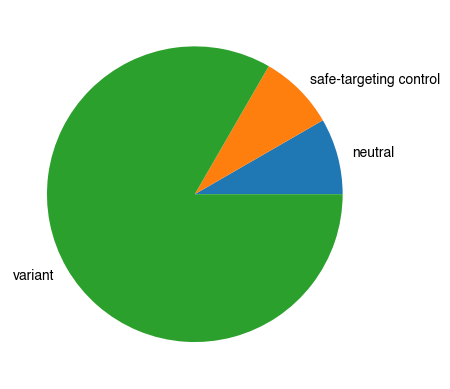

In [98]:
import matplotlib.pyplot as plt

#and we can check the make-up of the input variants
labels, x = np.unique(p53_library['classification'], return_counts=True)

plt.pie(x=x, labels=labels);

In [121]:
#and generating a pegRNA library

p53_prime = prime.run(p53_library, input_format='cBioPortal', chrom_dict=chrom_dict, pegRNAs_per_mut=5)

#prime.run() also detects misreported variants (usually these are off by 1 errors in terms of reporting of the start/end position of the mutation)
#need to fix error in silent substitution generation where it fails based on lowercase values...easy fix manually as well

Error in mutant # 179; Dropped from pegRNA generation
Variant Type = INDEL| REF = CGGACGCGGGTGCCGGGCGGGGGTGTGGAATCAACC | ALT = CT
CCAGCCCTGTCGTCTCTCCAGCCCCAGCTGCTCACCATCGCTATCTGAGCAGCGCTCATGGTGGGGGCAGCGCCTCACAACCTCCGTCATGTGCTGTGACTGCTTGTAGATGGCCATGGCGCGGACGCGGGTGCCGGGCGGGGGTGTGGAATCAACCCACAGCTGCACAGGGCAGGTCTTGGCCAGTTGGCAAAACATCTTGTTGAGGGCAGGGGAGTACTGTAGGAAGAGGAAGGAGACAGAGTTGAAAGTCAGGGCACAAGTGAACAGATAAAG
CCAGCCCTGTCGTCTCTCCAGCCCCAGCTGCTCACCATCGCTATCTGAGCAGCGCTCATGGTGGGGGCAGCGCCTCACAACCTCCGTCATGTGCTGTGACTGCTTGTAGATGGCCATGGCCGGACGCGGGTGCCGGGCGGGGGTGTGGAATCAACCCCACAGCTGCACAGGGCAGGTCTTGGCCAGTTGGCAAAACATCTTGTTGAGGGCAGGGGAGTACTGTAGGAAGAGGAAGGAGACAGAGTTGAAAGTCAGGGCACAAGTGAACAGATAAAG
Error in mutant # 384; Dropped from pegRNA generation
Variant Type = INDEL| REF = TGTAGGAGCTGCTGGTGCAGGGGCCACGG | ALT = TACCAGC
AGACTTGGCTGTCCCAGAATGCAAGAAGCCCAGACGGAAACCGTAGCTGCCCTGGTAGGTTTTCTGGGAAGGGACAGAAGATGACAGGGGCCAGGAGGGGGCTGGTGCAGGGGCCGCCGGTGTAGGAGCTGCTGGTGCAGGGGCCACGGGGGGAGCAGCCTCTGGCATTCTGGGAGCTTCATCTGGAC

In [123]:
p53_prime

,mutation_idx,level_0,Hugo_Symbol,Entrez_Gene_Id,Center,NCBI_Build,Chromosome,Start_Position,End_Position,Strand,...,indel_size,PEGG2_Score,RF_Score,pegRNA_rank,sensor_wt,sensor_alt,sensor_orientation,sensor_error,contains_polyT_terminator,pegRNA_id
0,0,0,TP53,7157.0,MSKCC,GRCh37,17,7577120,7577120,+,...,0,18.328365,0.538252,1.0,GGACAGGCACAAACACGCACCTCAAAGCTGTTCCGTCCCAGTAGAT...,GGACAGGCACAAACATGCACCTCAAAGCTGTTCCGTCCCAGTAGAT...,reverse-complement,No Error,False,pegRNA_0
1,0,0,TP53,7157.0,MSKCC,GRCh37,17,7577120,7577120,+,...,0,18.098002,0.451152,2.0,GGACAGGCACAAACACGCACCTCAAAGCTGTTCCGTCCCAGTAGAT...,GGACAGGCACAAACATGCACCTCAAAGCTGTTCCGTCCCAGTAGAT...,reverse-complement,No Error,False,pegRNA_1
2,0,0,TP53,7157.0,MSKCC,GRCh37,17,7577120,7577120,+,...,0,18.057559,8.879494,3.0,GGGACGGAACAGCTTTGAGGTGCGTGTTTGTGCCTGTCCTGGGAGA...,GGGACGGAACAGCTTTGAGGTGCATGTTTGTGCCTGTCCTGGGAGA...,reverse-complement,No Error,False,pegRNA_2
3,0,0,TP53,7157.0,MSKCC,GRCh37,17,7577120,7577120,+,...,0,17.991319,0.866195,4.0,CCGGTCTCTCCCAGGACAGGCACAAACACGCACCTCAAAGCTGTTC...,CCGGTCTCTCCCAGGACAGGCACAAACATGCACCTCAAAGCTGTTC...,reverse-complement,No Error,False,pegRNA_3
4,0,0,TP53,7157.0,MSKCC,GRCh37,17,7577120,7577120,+,...,0,17.981587,0.878350,5.0,GGACAGGCACAAACACGCACCTCAAAGCTGTTCCGTCCCAGTAGAT...,GGACAGGCACAAACATGCACCTCAAAGCTGTTCCGTCCCAGTAGAT...,reverse-complement,No Error,False,pegRNA_4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19006,3961,3961,NaN,NaN,NaN,NaN,X,148483043,148483043,NaN,...,0,15.200154,5.577658,1.0,TCACATTATCATCTTTTTTTTATTTTTTATATCCACAGGTTTTTGA...,TCACATTATCATCTTTTTTTTATTTTTTATATCCACAGGTTTTTGA...,reverse-complement,No Error,True,pegRNA_19006
19007,3961,3961,NaN,NaN,NaN,NaN,X,148483043,148483043,NaN,...,0,14.853377,4.954184,2.0,TCACATTATCATCTTTTTTTTATTTTTTATATCCACAGGTTTTTGA...,TCACATTATCATCTTTTTTTTATTTTTTATATCCACAGGTTTTTGA...,reverse-complement,No Error,True,pegRNA_19007
19008,3961,3961,NaN,NaN,NaN,NaN,X,148483043,148483043,NaN,...,0,14.799691,6.529744,3.0,TCACATTATCATCTTTTTTTTATTTTTTATATCCACAGGTTTTTGA...,TCACATTATCATCTTTTTTTTATTTTTTATATCCACAGGTTTTTGA...,reverse-complement,No Error,True,pegRNA_19008
19009,3961,3961,NaN,NaN,NaN,NaN,X,148483043,148483043,NaN,...,0,14.671082,6.439250,4.0,TCACATTATCATCTTTTTTTTATTTTTTATATCCACAGGTTTTTGA...,TCACATTATCATCTTTTTTTTATTTTTTATATCCACAGGTTTTTGA...,reverse-complement,No Error,True,pegRNA_19009


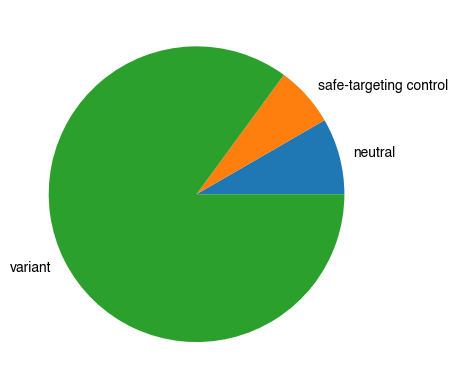

In [124]:
#and we can check the output as well 
labels, x = np.unique(p53_prime['classification'], return_counts=True)

plt.pie(x=x, labels=labels);

Non-targeting control guides can simply be appended to these library files if desired (see above for generation of non-targeting guides).

In [133]:
nontarget = library.nontargeting_guides(num_guides=1000, edit_type='prime')

p53_prime_w_nontargets = pd.concat((p53_prime, nontarget))


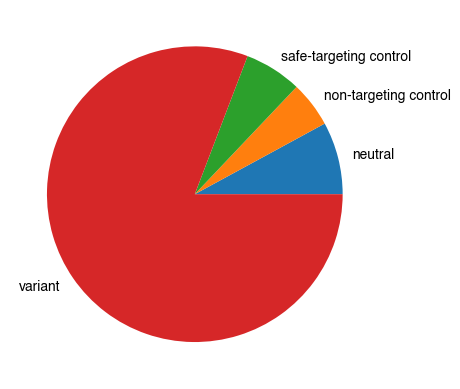

In [134]:
#and we can check the output as well again
labels, x = np.unique(p53_prime_w_nontargets['classification'], return_counts=True)

plt.pie(x=x, labels=labels);

We can do the same for a base editing library:

In [125]:
#and finally a base editing library

#NOTE: YOU WILL NEED TO ADJUST THE FILTRATION PARAMETER TO RETAIN SAFE-TARGETTING CONTROL GUIDES!!!
#include ABE+CBE, and the safe-targetting guides
filtration = ['A>G', 'C>T', 'A>A', 'T>T', 'C>C', 'G>G']

#first filter to only include SNPs
p53_SNPs = p53_library[p53_library['Variant_Type']=='SNP']

p53_base = base.run_base(p53_SNPs, input_format = 'cBioPortal', chrom_dict=chrom_dict, PAM='NGG', filtration=filtration)
p53_base

#the run_base() also detects variants that have been mis-reported (e.g. labelled as INS, but actually are INDELs) and returns errors, but continues running 

Error in mutant # 3357; Dropped from pegRNA generation
Variant Type = SNP| REF = G | ALT = A
GAAAAGAGCAGTCAGAGGACCAGGTCCTCAGCCCCCCAGCCCCCCAGCCCTCCAGGTCCCCAGCCCTCCAGGTCCCCAGCCCAACCCTTGTCCTTACCAGAACGTTGTTTTCAGGAAGTCTGAAAGACAAGAGCAGAAAGTCAGTCCCATGGAATTTTCGCTTCCCACAGGTCTCTGCTAGGGGGCTGGGGTTGGGGTGGGGGTGGTGGGCCTGCCCTTCCAATGGATCCACTCACAGTTT
GAAAAGAGCAGTCAGAGGACCAGGTCCTCAGCCCCCCAGCCCCCCAGCCCTCCAGGTCCCCAGCCCTCCAGGTCCCCAGCCCAACCCTTGTCCTTACCAGAACGTTGTTTTCAGGAAGTCGGAAAGACAAGAGCAGAAAGTCAGTCCCATGGAATTTTCGCTTCCCACAGGTCTCTGCTAGGGGGCTGGGGTTGGGGTGGGGGTGGTGGGCCTGCCCTTCCAATGGATCCACTCACAGTTT
Error in mutant # 3558; Dropped from pegRNA generation
Variant Type = SNP| REF = c | ALT = T
CGGTAAGAGGTGGGCCCAGGGGTCAGAGGCAAGCAGAGGCTGGGGCACAGCAGGCCAGTGTGCAGGGTGGCAAGTGGCTCCTGACCTGGAGTCTTCCAGTGTGATGATGGTGAGGATGGGCCTCCGGTTCATGCCGCCCATGCAGGAACTGTTACACATGTAGTTGTAGTGGATGGTGGTACAGTCAGAGCCAACCTAGGAGATAACACAGGCCCAAGATGAGGCCAGTGCGCCTTGGGGA
CGGTAAGAGGTGGGCCCAGGGGTCAGAGGCAAGCAGAGGCTGGGGCACAGCAGGCCAGTGTGCAGGGTGGCAAGTGGCTCCTGACCTG

,mutation_idx,level_0,Hugo_Symbol,Entrez_Gene_Id,Center,NCBI_Build,Chromosome,Start_Position,End_Position,Strand,...,Protospacer_Location,Ideal_Edit_Window,Editor,gRNA_id,OnTarget_Azimuth_Score,sensor_wt,sensor_alt,sensor_orientation,sensor_error,contains_polyT_terminator
0,3,3,TP53,7157.0,MSKCC,GRCh37,17,7577121,7577121,+,...,4,True,C>T,gRNA_0,38.0,CGCCGGTCTCTCCCAGGACAGGCACAAACACGCACCTCAA,CGCCGGTCTCTCCCAGGACAGGCACAAACACACACCTCAA,reverse-complement,No Error,False
1,3,3,TP53,7157.0,MSKCC,GRCh37,17,7577121,7577121,+,...,3,False,C>T,gRNA_1,53.0,GCGCCGGTCTCTCCCAGGACAGGCACAAACACGCACCTCA,GCGCCGGTCTCTCCCAGGACAGGCACAAACACACACCTCA,reverse-complement,No Error,False
2,5,5,TP53,7157.0,MSKCC,GRCh37,17,7577545,7577545,+,...,12,False,A>G,gRNA_2,55.0,GGTGAGGATGGGCCTCCGGTTCATGCCGCCCATGCAGGAA,GGTGAGGATGGGCCTCCGGTTCACGCCGCCCATGCAGGAA,reverse-complement,No Error,False
3,5,5,TP53,7157.0,MSKCC,GRCh37,17,7577545,7577545,+,...,15,False,A>G,gRNA_3,45.0,GAGGATGGGCCTCCGGTTCATGCCGCCCATGCAGGAACTG,GAGGATGGGCCTCCGGTTCACGCCGCCCATGCAGGAACTG,reverse-complement,No Error,False
4,8,8,TP53,7157.0,MSKCC,GRCh37,17,7577539,7577539,+,...,18,False,C>T,gRNA_4,55.0,GGTGAGGATGGGCCTCCGGTTCATGCCGCCCATGCAGGAA,GGTGAGGATGGGCCTCCAGTTCATGCCGCCCATGCAGGAA,reverse-complement,No Error,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1420,1617,1617,NaN,NaN,NaN,NaN,X,142012766,142012766,NaN,...,5,False,T>T,gRNA_1420,36.0,TTCCTGTGGAGACCTAATATGTCTTTTCCTACAAATCCCA,TTCCTGTGGAGACCTAATATGTCTTTTCCTACAAATCCCA,reverse-complement,No Error,False
1421,1621,1621,NaN,NaN,NaN,NaN,X,147304294,147304294,NaN,...,18,False,C>C,gRNA_1421,38.0,TCTTTTTTATGGCCTGAGACAGTATTTTAAAAAACAGATG,TCTTTTTTATGGCCTGAGACAGTATTTTAAAAAACAGATG,reverse-complement,No Error,True
1422,1622,1622,NaN,NaN,NaN,NaN,X,147826950,147826950,NaN,...,14,False,A>A,gRNA_1422,35.0,TCTACTCTATCTCCGGAATTATATTTTTAGAAGCCAAGTG,TCTACTCTATCTCCGGAATTATATTTTTAGAAGCCAAGTG,reverse-complement,No Error,False
1423,1623,1623,NaN,NaN,NaN,NaN,X,148107815,148107815,NaN,...,3,False,T>T,gRNA_1423,44.0,AAAGTTTATGAACCTGATTTTGATTTAGAAGTATTATTAT,AAAGTTTATGAACCTGATTTTGATTTAGAAGTATTATTAT,reverse-complement,No Error,False


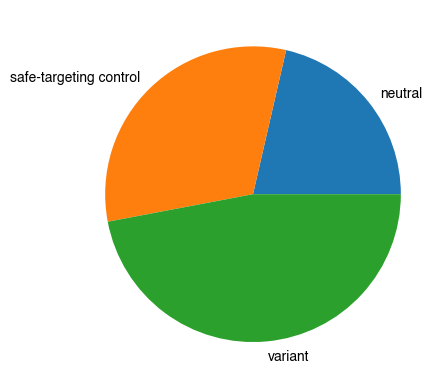

In [126]:
labels, x = np.unique(p53_base['classification'], return_counts=True)

plt.pie(x=x, labels=labels);